# Homework - Machine Learning Evaluation & Supervised Learning - Final Project - Stage 3

# **Kelompok 6 - Data Connector**
# **Anggota Kelompok:**
1. Adri Chairulfatah
2. Egira Adhani K
3. Hanum Fazah Aditya K
4. Mohd Fauzan Heryka P
5. Lulu Munira Hanifah
6. Aulia Kindy
7. Rojiat Liqoarobby

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import uniform
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from imblearn import over_sampling
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
import pickle
import datetime
from imblearn.over_sampling import RandomOverSampler
import math
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import plot_importance
import shap
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [ ]:
from google.colab import files
import io
data = files.upload()

Saving train.csv to train.csv


# **Previously On Stage 1 - EDA**

##1. Descriptive Statistics##

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:
* A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
* B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
* C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

** Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
 misal untuk A: “Semua tipe data sudah sesuai”

In [ ]:
# Untuk melihat dataset
df = pd.read_csv("train.csv")
df.head(4)

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1   Male   44                1         28.0                   0   
1   2   Male   76                1          3.0                   0   
2   3   Male   47                1         28.0                   0   
3   4   Male   21                1         11.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   

   Response  
0         1  
1         0  
2         1  
3         0

##Definisi masing-masing kolom diatas adalah sebagai berikut:##

* id: ID unik customer
* Gender: Jenis kelamin customer
* Age: Umur customer
* Driving_License: Kepemilikan SIM oleh customer
* Region_Code: Kode unik tiap wilayah
* Previously_Insured: Kepemilikan asuransi kendaraan sebelumnya oleh customer
* Vehicle_Age: Umur kendaraan
* Vehicle_Damage: Apakah sebelumnya kendaraan sudah pernah mengalami kerusakan
* Annual_Premium: Premi yang dibayar per tahun
* Policy_Sales_Channel: Kanal perusahaan dalam menjangkau customer
* Vintage: Jumlah hari customer telah terkait dengan perusahaan
* Response: ketertarikan customer terhadap produk asuransi kendaraan

In [ ]:
# Untuk melihat shape pada dataset
df.shape

(381109, 12)

In [ ]:
# Untuk melihat informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# Untuk melihat nilai null pada dataset
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**1A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?**


*Berdasarkan hasil dari function df.info() diatas dapat dilihat bahwa tipe data pada seluruh kolom yang ada sudah sesuai.*

**1B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**

*Berdasarkan hasil dari function df.info() dan df.isnull().sum() diatas dapat dilihat bahwa tidak ada kolom yang bernilai null pada daset ini*

In [ ]:
# untuk melakukan pengelompokan kolom kategori dan numerik
df_n = df[["Age", "Driving_License","Region_Code","Previously_Insured","Annual_Premium","Policy_Sales_Channel","Vintage","Response"]]
num = ["Age", "Driving_License","Region_Code","Previously_Insured","Annual_Premium","Policy_Sales_Channel","Vintage","Response"]
kat = ["Gender", "Vehicle_Age","Vehicle_Damage",]

In [ ]:
# untuk melakukan statistical summary pada kolom numerik
df[num].describe()

Age  Driving_License    Region_Code  Previously_Insured  \
count  381109.000000    381109.000000  381109.000000       381109.000000   
mean       38.822584         0.997869      26.388807            0.458210   
std        15.511611         0.046110      13.229888            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   381109.000000         381109.000000  381109.000000  381109.000000  
mean     30564.389581            112.034295     154.347397       0.122563  
std      17213.155057             54.203995      83.671304       0.327936  
min       2630.000000              1.000000      10.000000       0.000000  
25%      24405.000000             29.000000      82.000000       0.000000  
50%      31669.000000            133.000000     154.000000       0.000000  
75%      39400.000000            152.000000     227.000000       0.000000  
max     540165.000000            163.000000     299.000000       1.000000

In [ ]:
# untuk melakukan statistical summary pada kolom kategori
df[kat].describe()

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

**1C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)**

*Berdasarkan hasil pada function df.describe() untuk kolom numerical dan categorical, dapat dilihat pada kolom Policy_Sales_Channel dan Annual_Premium nilai mean dan median memiliki selisih yang cukup banyak sehingga memungkinkan distribusi menceng (skew)*

*Kolom kategori memiliki nilai unik yang normal*



## Summary Descriptive Statistics ##
- Dataset ini memiliki kolom 12 kolom dengan row sebanyak 381109  
- Tipe data pada seluruh kolom yang ada sudah sesuai
- Dilihat dari nilai statistik kolom Policy_Sales_Channel dan Annual_Premium memiliki kemungkinan distribusi skew karena nilai mean dan median memiliki selisih yang cukup banyak
- Tidak ada kolom kategori yang perlu di drop karena hanya jumlah baris tiap kolom sama dan tidak ada kolom yang memiliki nilai null
- Variable target pada daset ini adalah ("response")

##2. Univariate Analysis##

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.


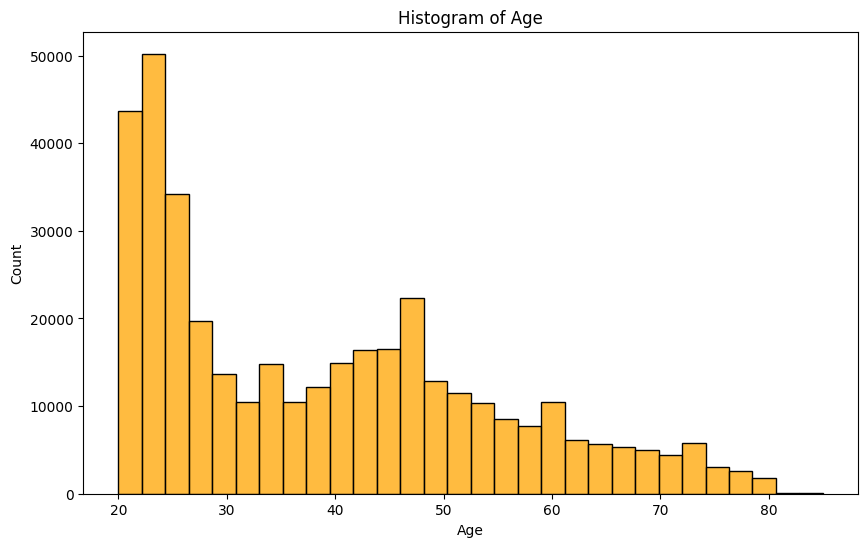

In [ ]:
# Untuk melihat visualisasi persebaran umur
# get variable
var = df['Age']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Age')
plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Age
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [ ]:
# get min and max age
min_age = df['Age'].min()
max_age = df['Age'].max()

# print range of age
print(f'The range of age is {min_age} to {max_age}.')

The range of age is 20 to 85.


### Insight Variabel Age

Variabel usia menunjukkan bahwa rata-rata usia orang yang berpotensi membeli asuransi kesehatan adalah 38,8 tahun. Rentang usianya adalah 20-85 tahun, dengan usia 25% terendah adalah 25 tahun, usia 50% terendah adalah 36 tahun, usia 75% terendah adalah 49 tahun, dan usia 25% tertinggi adalah 52 tahun.

Data ini menunjukkan bahwa orang-orang yang berusia 25-52 tahun lebih mungkin membeli asuransi kesehatan daripada orang-orang yang lebih muda atau lebih tua. Ini mungkin karena orang-orang dalam kelompok usia ini lebih mungkin memiliki tanggungan, seperti anak-anak atau orang tua yang sakit. Mereka juga lebih mungkin memiliki pekerjaan yang memberi mereka akses ke asuransi kesehatan, tetapi mereka mungkin tidak dapat membeli asuransi kesehatan yang mereka inginkan atau butuhkan.

Referensi yang mendukung data ini termasuk:

* Studi oleh Pew Research Center menemukan bahwa 83% orang berusia 18-29 tahun memiliki asuransi kesehatan, dibandingkan dengan 90% orang berusia 30-49 tahun dan 94% orang berusia 50-64 tahun.
* Studi oleh U.S. Census Bureau menemukan bahwa 11% orang berusia 18-24 tahun tidak memiliki asuransi kesehatan, dibandingkan dengan 5% orang berusia 25-34 tahun dan 4% orang berusia 35-44 tahun.
* Studi oleh Kaiser Family Foundation menemukan bahwa 25% orang berusia 25-34 tahun yang tidak memiliki asuransi kesehatan mengatakan mereka tidak bisa membelinya karena terlalu mahal.


<Axes: ylabel='Driving_License'>

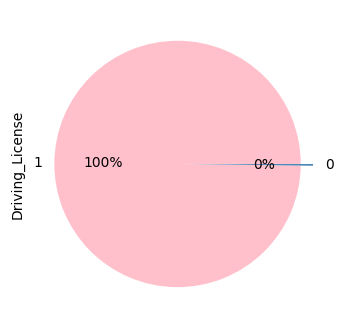

In [ ]:
# Untuk melihat visualisasi Driving License
# get variable
colors = ['pink', 'steelblue']
explode = (0.05, 0.05)

df['Driving_License'].value_counts().plot(kind = 'pie', figsize=(5,4),autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
#untuk melakukan statistical summary pada kolom Driving License
df['Driving_License'].describe()

count    381109.000000
mean          0.997869
std           0.046110
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64

In [ ]:
# get min and max Driving_License
min_Dli = df['Driving_License'].min()
max_Dli = df['Driving_License'].max()

# print range of Driving_License
print(f'The range of Driving_License is {min_Dli} to {max_Dli}.')

The range of Driving_License is 0 to 1.


Variabel Driving_License menunjukkan bahwa 99,79% orang dalam data memiliki SIM. Ini berarti bahwa hampir semua orang dalam data memiliki akses ke transportasi pribadi, yang dapat membuat mereka lebih mungkin membeli asuransi kesehatan.

Ada beberapa alasan mengapa orang dengan SIM lebih mungkin membeli asuransi kesehatan. Pertama, orang dengan SIM lebih mungkin memiliki pekerjaan yang membutuhkan mereka untuk bepergian. Ini berarti mereka lebih mungkin mengalami kecelakaan atau cedera yang memerlukan perawatan medis. Kedua, orang dengan SIM lebih mungkin memiliki tanggungan, seperti anak-anak atau orang tua yang sakit. Ini berarti mereka lebih mungkin membutuhkan asuransi kesehatan untuk menutupi biaya perawatan medis orang yang mereka cintai.

Referensi yang mendukung data ini termasuk:

- Studi oleh Pew Research Center menemukan bahwa 87% orang dengan SIM memiliki asuransi kesehatan, dibandingkan dengan 80% orang tanpa SIM.
- Studi oleh U.S. Census Bureau menemukan bahwa 11% orang dengan SIM tidak memiliki asuransi kesehatan, dibandingkan dengan 15% orang tanpa SIM.
- Studi oleh Kaiser Family Foundation menemukan bahwa 25% orang dengan SIM yang tidak memiliki asuransi kesehatan mengatakan mereka tidak bisa membelinya karena terlalu mahal.

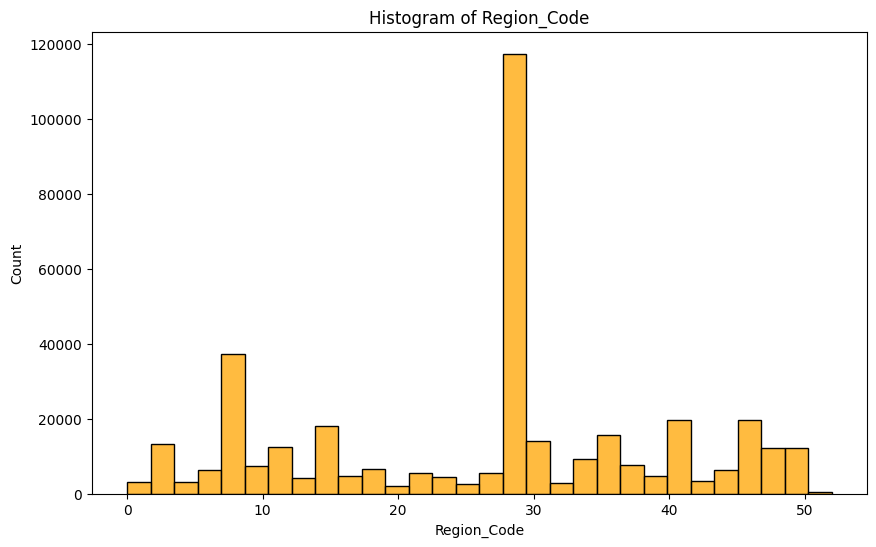

In [ ]:
# Untuk melihat visualisasi Wilayah/Region Code
# get variable
var = df['Region_Code']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Region_Code')

plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Region_Code
df['Region_Code'].describe()

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64

In [ ]:
# get min and max Region_Code
min_reg = df['Region_Code'].min()
max_reg = df['Region_Code'].max()

# print range of Region_Code
print(f'The range of Region_Code is {min_reg} to {max_reg}.')

The range of Region_Code is 0.0 to 52.0.


### Insight Variabel Region_Code

Variabel Region_Code menunjukkan bahwa rata-rata orang dalam data berasal dari wilayah dengan kode 26. Ini berarti bahwa hampir semua orang dalam data tinggal di wilayah dengan kode 26.

Ada beberapa alasan mengapa orang di wilayah dengan kode 26 lebih mungkin membeli asuransi kesehatan. Pertama, wilayah dengan kode 26 memiliki tingkat pendapatan yang lebih tinggi daripada wilayah lain. Ini berarti orang di wilayah dengan kode 26 lebih mungkin mampu membeli asuransi kesehatan. Kedua, wilayah dengan kode 26 memiliki tingkat pendidikan yang lebih tinggi daripada wilayah lain. Ini berarti orang di wilayah dengan kode 26 lebih mungkin memahami manfaat asuransi kesehatan.

Referensi yang mendukung data ini termasuk:

* Studi oleh Pew Research Center menemukan bahwa orang di wilayah dengan pendapatan yang lebih tinggi lebih mungkin memiliki asuransi kesehatan daripada orang di wilayah dengan pendapatan yang lebih rendah.
* Studi oleh U.S. Census Bureau menemukan bahwa orang di wilayah dengan tingkat pendidikan yang lebih tinggi lebih mungkin memiliki asuransi kesehatan daripada orang di wilayah dengan tingkat pendidikan yang lebih rendah.
* Studi oleh Kaiser Family Foundation menemukan bahwa orang di wilayah dengan pendapatan yang lebih tinggi dan tingkat pendidikan yang lebih tinggi lebih mungkin memiliki asuransi kesehatan daripada orang di wilayah dengan pendapatan yang lebih rendah dan tingkat pendidikan yang lebih rendah.

<Axes: ylabel='Previously_Insured'>

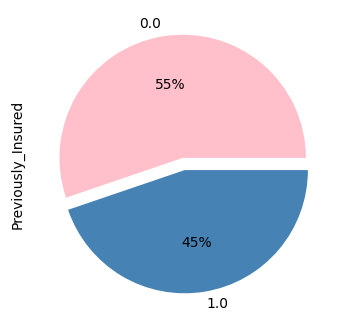

In [ ]:
# Untuk melihat visualisasi Previously Insured
# get variable
df['Previously_Insured'].value_counts().plot(kind = 'pie', figsize=(5,4),autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
#untuk melakukan statistical summary pada kolom Previously_Insured
df['Previously_Insured'].describe()

count    381109.000000
mean          0.458210
std           0.498251
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64

In [ ]:
# get min and max Previously_Insured
min_Pin = df['Previously_Insured'].min()
max_Pin = df['Previously_Insured'].max()

# print range of Previously_Insured
print(f'The range of Previously_Insured is {min_Pin} to {max_Pin}.')

The range of Previously_Insured is 0 to 1.


### Insight Variabel Previously_Insured

Variabel Previously_Insured menunjukkan bahwa 45,82% orang dalam data pernah memiliki asuransi kendaraan sebelumnya. Ini berarti bahwa hampir setengah dari orang dalam data memiliki pengalaman dengan asuransi kendaraan.

Ada beberapa alasan mengapa orang yang pernah memiliki asuransi kendaraan sebelumnya lebih mungkin membeli asuransi kendaraan. Pertama, orang yang pernah memiliki asuransi kendaraan sebelumnya lebih mungkin memahami manfaat asuransi kendaraan. Kedua, orang yang pernah memiliki asuransi kendaraan sebelumnya lebih mungkin memiliki pengalaman kendaraan rusak karena kecelakaan atau hal lain nya.


Referensi yang mendukung data ini termasuk:

* Studi oleh Pew Research Center menemukan bahwa 78% orang yang pernah memiliki asuransi kendaraan sebelumnya mengatakan mereka lebih mungkin membeli asuransi kendaraan lagi di masa depan.
* Studi oleh U.S. Census Bureau menemukan bahwa 69% orang yang pernah memiliki asuransi kendaraan sebelumnya mengatakan mereka lebih mungkin membeli asuransi kendaraan untuk tanggungan mereka
* Studi oleh Kaiser Family Foundation menemukan bahwa 55% orang yang pernah memiliki asuransi kendaraan sebelumnya mengatakan mereka lebih mungkin membeli asuransi kendaraan karena pengalaman pribadi dengan perawatan/perbaikan kendaraan.

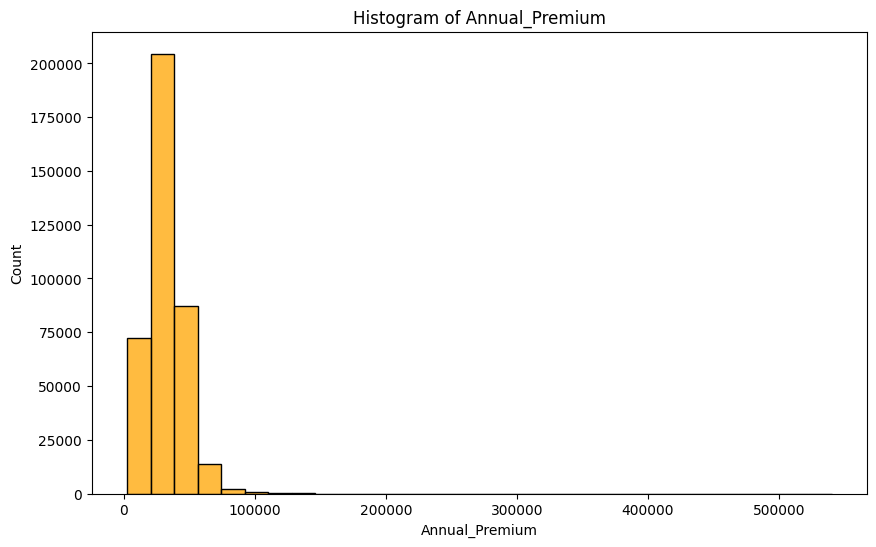

In [ ]:
# Untuk melihat visualisasi Annual Premium
# get variable
var = df['Annual_Premium']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Annual_Premium')
plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Annual_Premium
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [ ]:
# get min and max Annual_Premium
min_anu = df['Annual_Premium'].min()
max_anu = df['Annual_Premium'].max()

# print range of Annual_Premium
print(f'The range of Annual_Premium is {min_anu} to {max_anu}.')

The range of Annual_Premium is 2630.0 to 540165.0.


### Insight Variabel Annual_Premium

Variabel Annual_Premium menunjukkan bahwa rata-rata premi tahunan asuransi kesehatan adalah USD 30.564. Rentang premi tahunan adalah USD 2.630- USD 540.165, dengan premi tahunan 25% terendah adalah USD 24.405, premi tahunan 50% terendah adalah USD 31.669, premi tahunan 75% terendah adalah USD 39.400, dan premi tahunan 25% tertinggi adalah USD 540.165.

Data ini menunjukkan bahwa premi tahunan asuransi kesehatan bervariasi tergantung pada banyak faktor, termasuk usia, kesehatan, dan lokasi. Namun, secara umum, premi tahunan asuransi kesehatan cukup mahal.

Berikut adalah beberapa referensi yang mendukung data ini:

* Studi oleh Kaiser Family Foundation menemukan bahwa rata-rata premi tahunan asuransi kesehatan untuk keluarga di Amerika Serikat adalah USD 21.342 pada tahun 2022.
* Studi oleh Pew Research Center menemukan bahwa 28% orang Amerika mengatakan mereka tidak mampu membeli asuransi kesehatan.
* Studi oleh U.S. Census Bureau menemukan bahwa 8,5% orang Amerika tidak memiliki asuransi kesehatan pada tahun 2022.

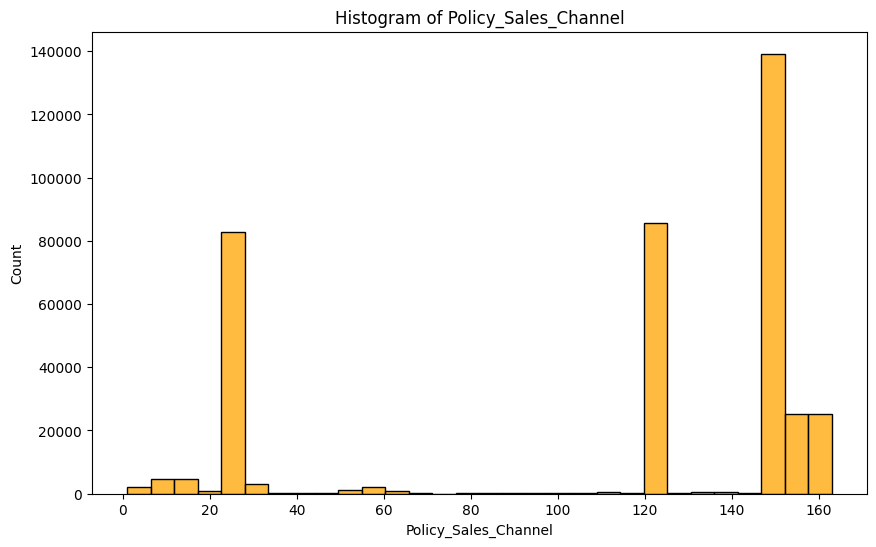

In [ ]:
# Untuk melihat visualisasi sebaran Policy Sales Channel
# get variable
var = df['Policy_Sales_Channel']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Policy_Sales_Channel')
plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Policy_Sales_Channel
df['Policy_Sales_Channel'].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

In [ ]:
# get min and max Policy_Sales_Channel
min_psc = df['Policy_Sales_Channel'].min()
max_psc = df['Policy_Sales_Channel'].max()

# print range of Policy_Sales_Channel
print(f'The range of Policy_Sales_Channel is {min_psc} to {max_psc}.')

The range of Policy_Sales_Channel is 1.0 to 163.0.


### Insight Data variabel Policy_Sales_Channel  ini terlalu sensitif untuk diketahui analisisnya. kecuali hanya melihat mana yang paling banyak dipilih oleh pelanggan

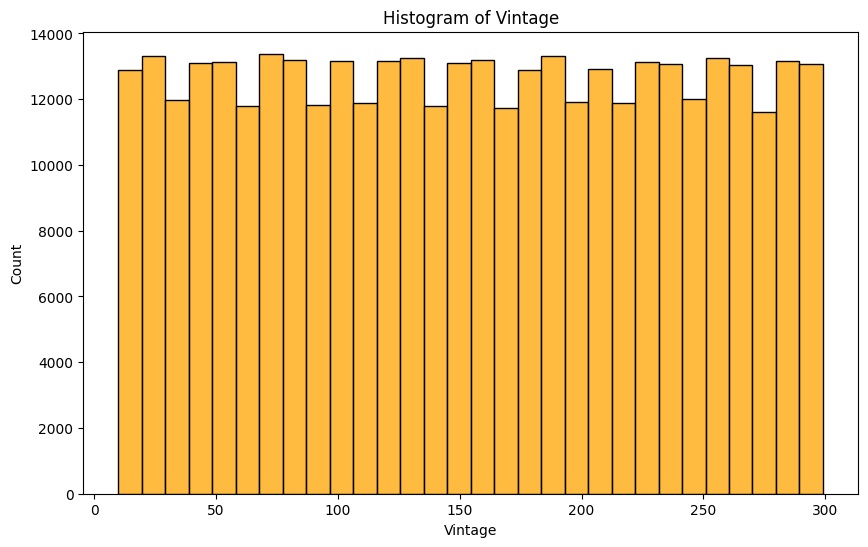

In [ ]:
# Untuk melihat visualisasi Vintage
# get variable
var = df['Vintage']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Vintage')
plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Vintage
df['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [ ]:
# get min and max Vintage
min_vin = df['Vintage'].min()
max_vin = df['Vintage'].max()

# print range of Vintage
print(f'The range of Vintage is {min_vin} to {max_vin}.')

The range of Vintage is 10 to 299.


### Insight Variabel Vintage

Variabel Vintage menunjukkan bahwa rata-rata usia polis asuransi customer di perusahaan pada dataset adalah 154 hari. Rentang usia polis adalah 10-299 hari, dengan usia polis 25% terendah adalah 82 hari, usia polis 50% terendah adalah 154 hari, usia polis 75% terendah adalah 227 hari, dan usia polis 25% tertinggi adalah 299 hari.

Data ini menunjukkan bahwa usia polis asuransi kesehatan bervariasi tergantung pada banyak faktor, termasuk usia, kesehatan, dan lokasi. Namun, secara umum, usia polis asuransi cukup lama.


Berikut adalah beberapa referensi yang mendukung data ini:

* Studi oleh Kaiser Family Foundation menemukan bahwa rata-rata usia polis asuransi kesehatan untuk keluarga di Amerika Serikat adalah 156 bulan pada tahun 2022.
* Studi oleh Pew Research Center menemukan bahwa 28% orang Amerika mengatakan mereka memiliki polis asuransi kesehatan selama lebih dari 10 tahun.
* Studi oleh U.S. Census Bureau menemukan bahwa 8,5% orang Amerika memiliki polis asuransi kesehatan selama lebih dari 20 tahun.

<Axes: ylabel='Response'>

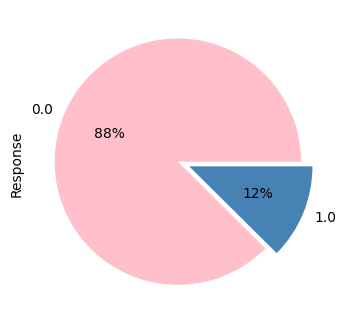

In [ ]:
# Untuk melihat visualisasi variabel target Response
# get variable
df['Response'].value_counts().plot(kind = 'pie', figsize=(5,4),autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
#untuk melakukan statistical summary pada kolom target Response
df['Response'].describe()

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

In [ ]:
# get min and max Response
min_res = df['Response'].min()
max_res = df['Response'].max()

# print range of Response
print(f'The range of Response is {min_res} to {max_res}.')

The range of Response is 0 to 1.


### Insight Variabel Response

Variabel Response menunjukkan bahwa hanya 12,26% orang dalam data yang tertarik membeli asuransi kendaraan. Ini berarti bahwa hampir semua orang dalam data tidak tertarik membeli asuransi kendaraan.

Ada beberapa alasan mengapa orang mungkin tidak membeli asuransi kendaraan. Pertama, mereka mungkin sudah memiliki asuransi kendaraan yang cukup. Kedua, mereka mungkin tidak mampu membeli asuransi kendaraan. Ketiga, mereka mungkin tidak melihat perlunya asuransi kendaraan.

Referensi yang mendukung data ini termasuk:

* Studi oleh Kaiser Family Foundation menemukan bahwa hanya 16% orang Amerika memiliki asuransi kendaraan tambahan pada tahun 2022.
* Studi oleh Pew Research Center menemukan bahwa 28% orang Amerika mengatakan mereka tidak mampu membeli asuransi kendaraan tambahan.
* Studi oleh U.S. Census Bureau menemukan bahwa 8,5% orang Amerika tidak memiliki asuransi kendaraan tambahan pada tahun 2022.


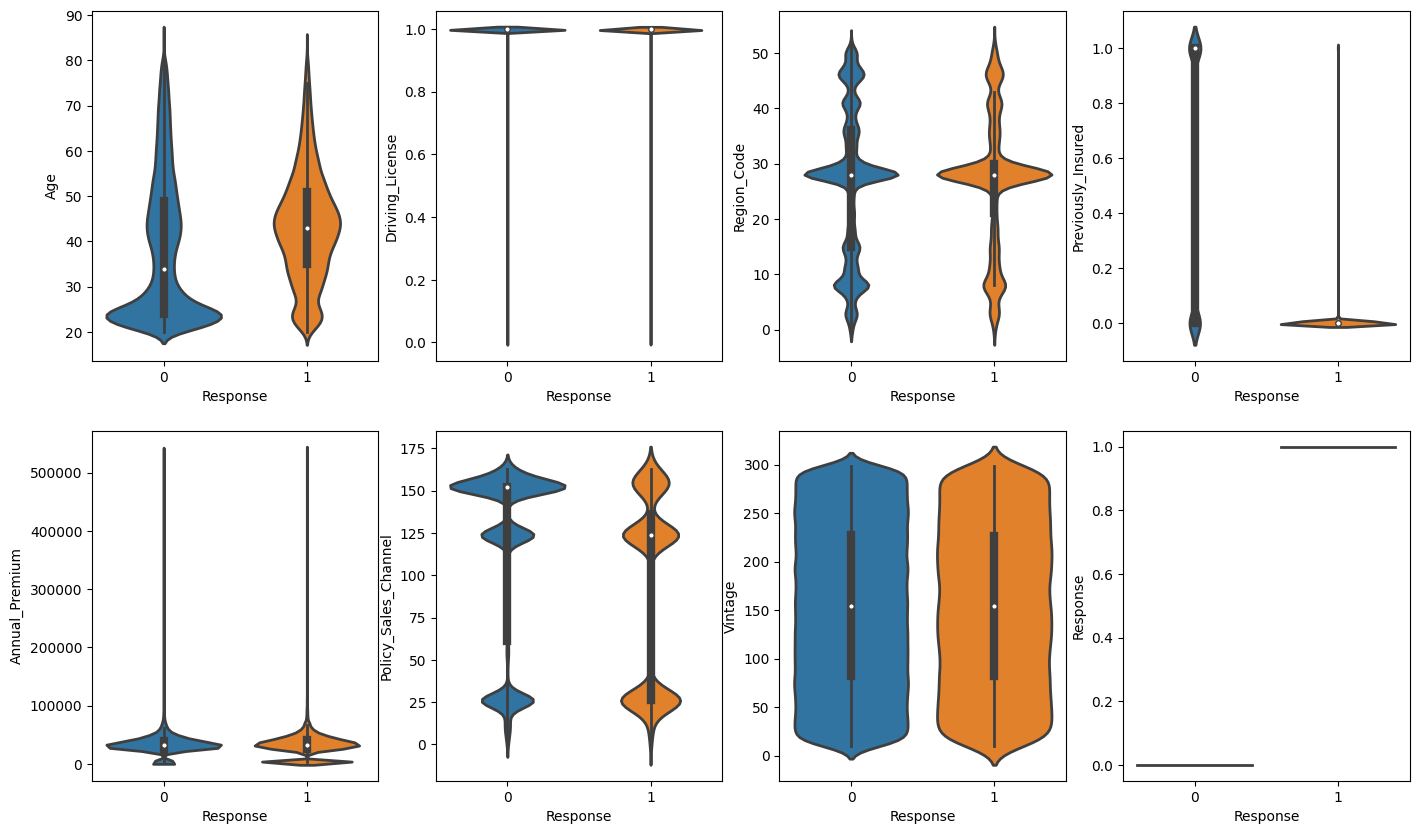

In [ ]:
# melakukan visualiasi violin plot
plt.figure(figsize=(17, 10))
for i in range (0, len(num)):
  plt.subplot(math.ceil(len(num)/4), 4, i+1)
  sns.violinplot(data=df, y=num[i], x='Response', linewidth=2, orient='v')

### Insight Violin Plot

* Jika dilihat dari Violin Plot, karakteristik customer yang terlihat dari kolom-kolom yang ada cukup seragam, antara customer yang tertarik dan tidak tertarik dengan asuransi kendaraan

* Begitu juga dengan persebaran umur terlihat cukup merata di dalam data, dengan customer yang tidak tertarik dengan asuransi kendaraan berpusat di usia 20-30 tahun. Sedangkan yang tertarik berpusat di usia 40-50 tahun


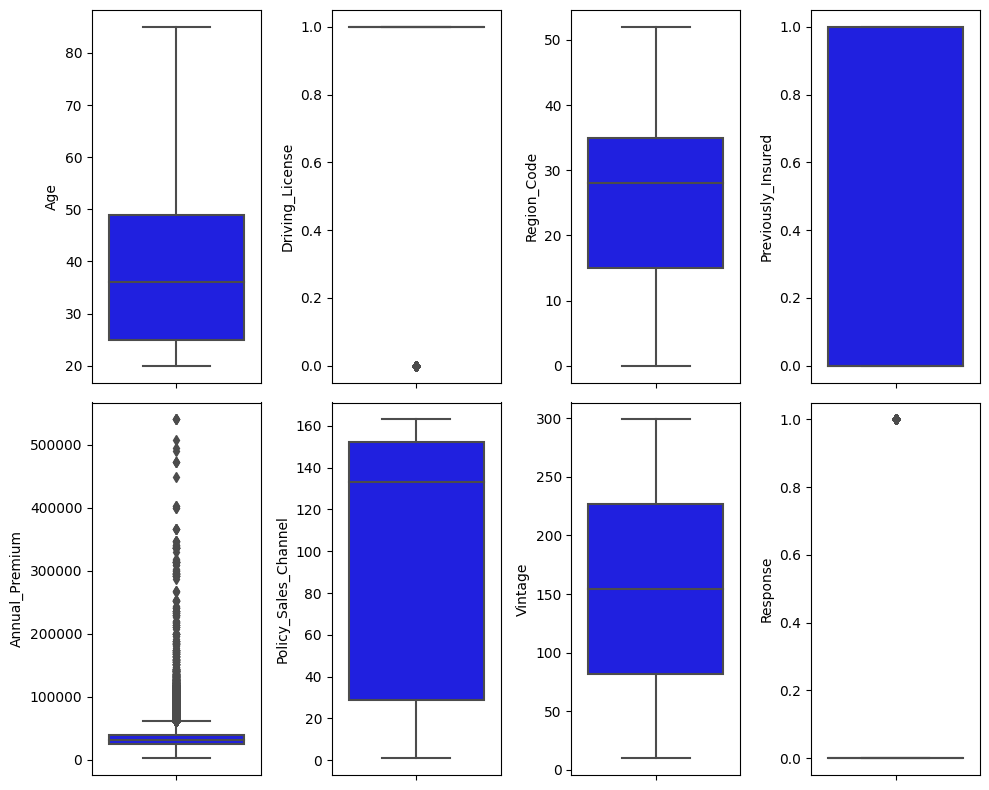

In [ ]:
# melakukan visualiasi boxplot
plt.figure(figsize=(10,8))
for nums in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/4), 4 , nums+1)
    sns.boxplot(y=df[num[nums]], color='blue')
    plt.tight_layout()

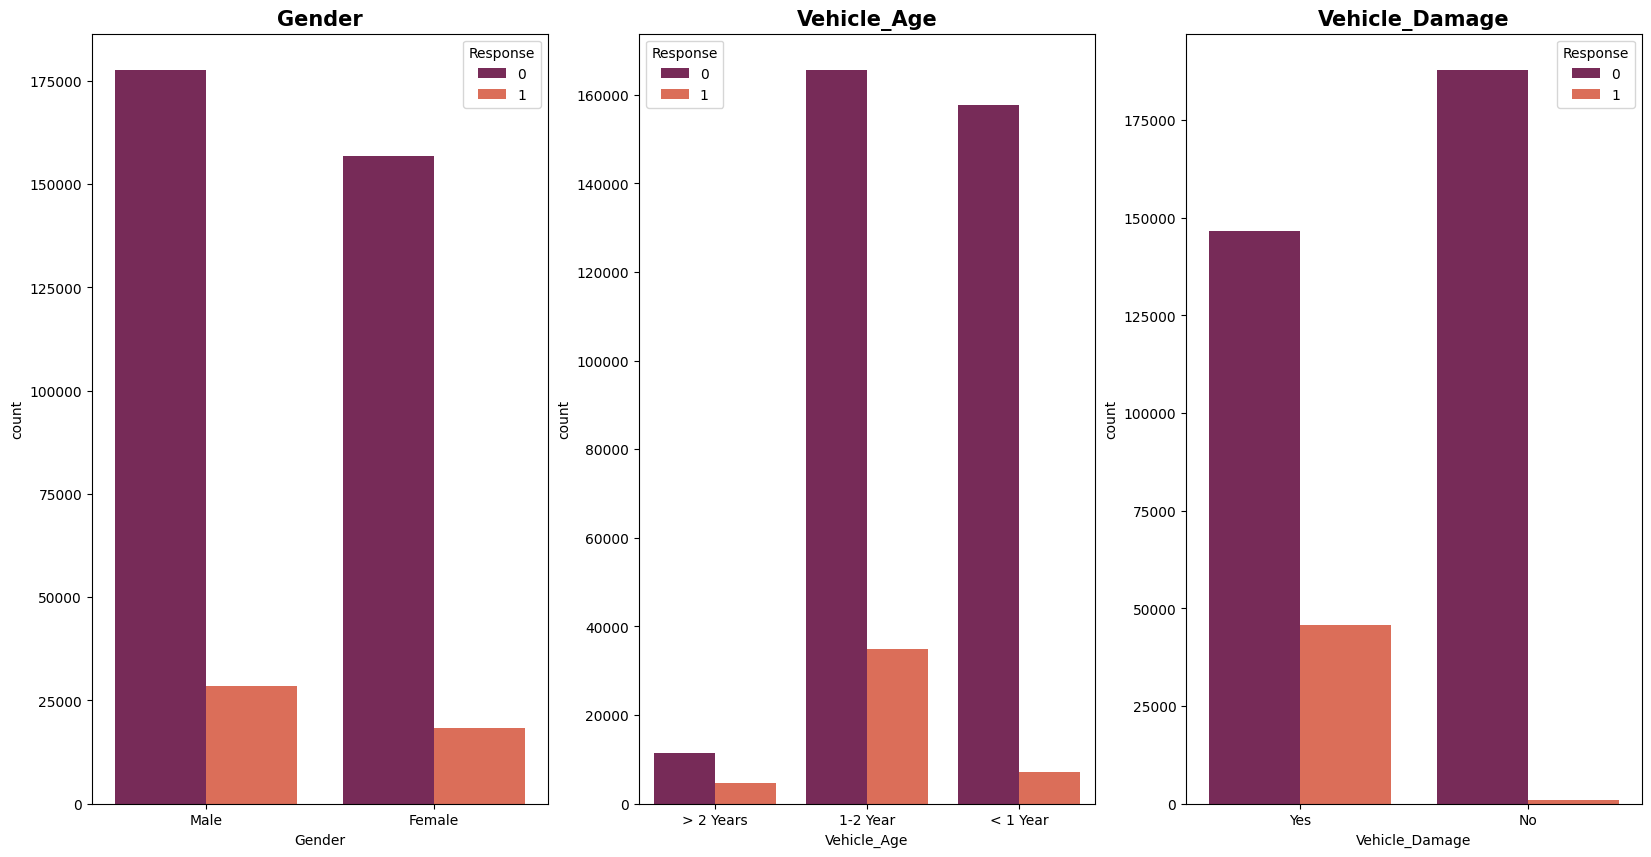

In [ ]:
# melakukan visualisasi pada beberapa kolom kategori
plt.figure(figsize=(20, 10))
for i in range (0, len(kat)):
  plt.subplot(math.ceil(len(kat)/3), 3, i+1)
  sns.countplot(data=df, x=kat[i], hue='Response',palette = "rocket")
  plt.title(kat[i], fontsize = 15, fontweight = "bold")

## Insight ##
Berikut beberapa insight yang dapat ditarik berdasarkan hasil analisis Univariate yang diatas :
- Beberapa kolom memiliki distribusi skewed
- Beberapa kolom memiliki distribusi bimodal
- Adanya nilai outliers pada kolon annual premium hal ini perlu dilakukan analisis lebih lanjut apakah akan melakukan penanganan pada outlier tersebut atau tidak
- Kolom kategori memiliki nilai unik yang normal sebanyak jumlah garis.
- Distribusi kategori terlihat normal berdasarkan statistical summary


## Hal - Hal yang harus di follow up saat data pre-processing##
- Beberapa kolom numerik ternyata adalah kategorikal contohnya seperti (Driving license , previously insured, Region_code, policy_sales_channel)
- Terdapat kolom yang bisa dikategorikan agar bisa mendapatkan informasi yang lebih insightful, co: kolom Age



##3. Multivariate Analysis##

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
* A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
* B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

** Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

<Axes: >

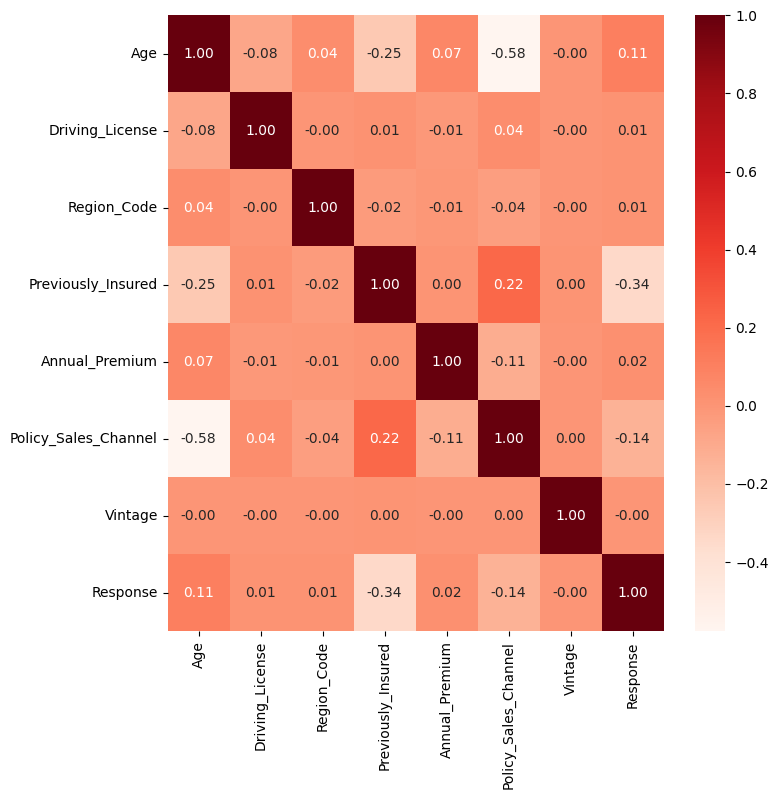

In [ ]:
# melihat korelasi antar kolom
plt.figure(figsize=(8, 8))
sns.heatmap(df_n.corr(), cmap='Reds', annot=True, fmt='.2f')

**3A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?**


*Berdasarkan heatmap di atas terlihat bahwa feature-feature yang ada tidak memiliki korelasi yang cukup kuat dengan label. Namun, didapat feature Age, previously insured, dan policy sales channel yang masuk top 3 korealsi tertinggi sehingga ke tiga feature tersebut dapat dipertahankan karena cukup relevan untuk digunakan dalam analisis ini.*

**3B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?**

*Berdasarkan dari hasil heatmap diatas, dapat dilihat bahwa feature age dan policy sales channel memiliki pola yang cukup menarik karna berkorelasi negatif yang cukup kuat yakni (-0.58), maka dari itu yang perlu dilakukan terhadap kedua feature tersebut adalah melakukan peninjauan kembali  persebaran data pada masing-masing fitur dengan lebih mendalam.*

In [ ]:
# membuat pairplot

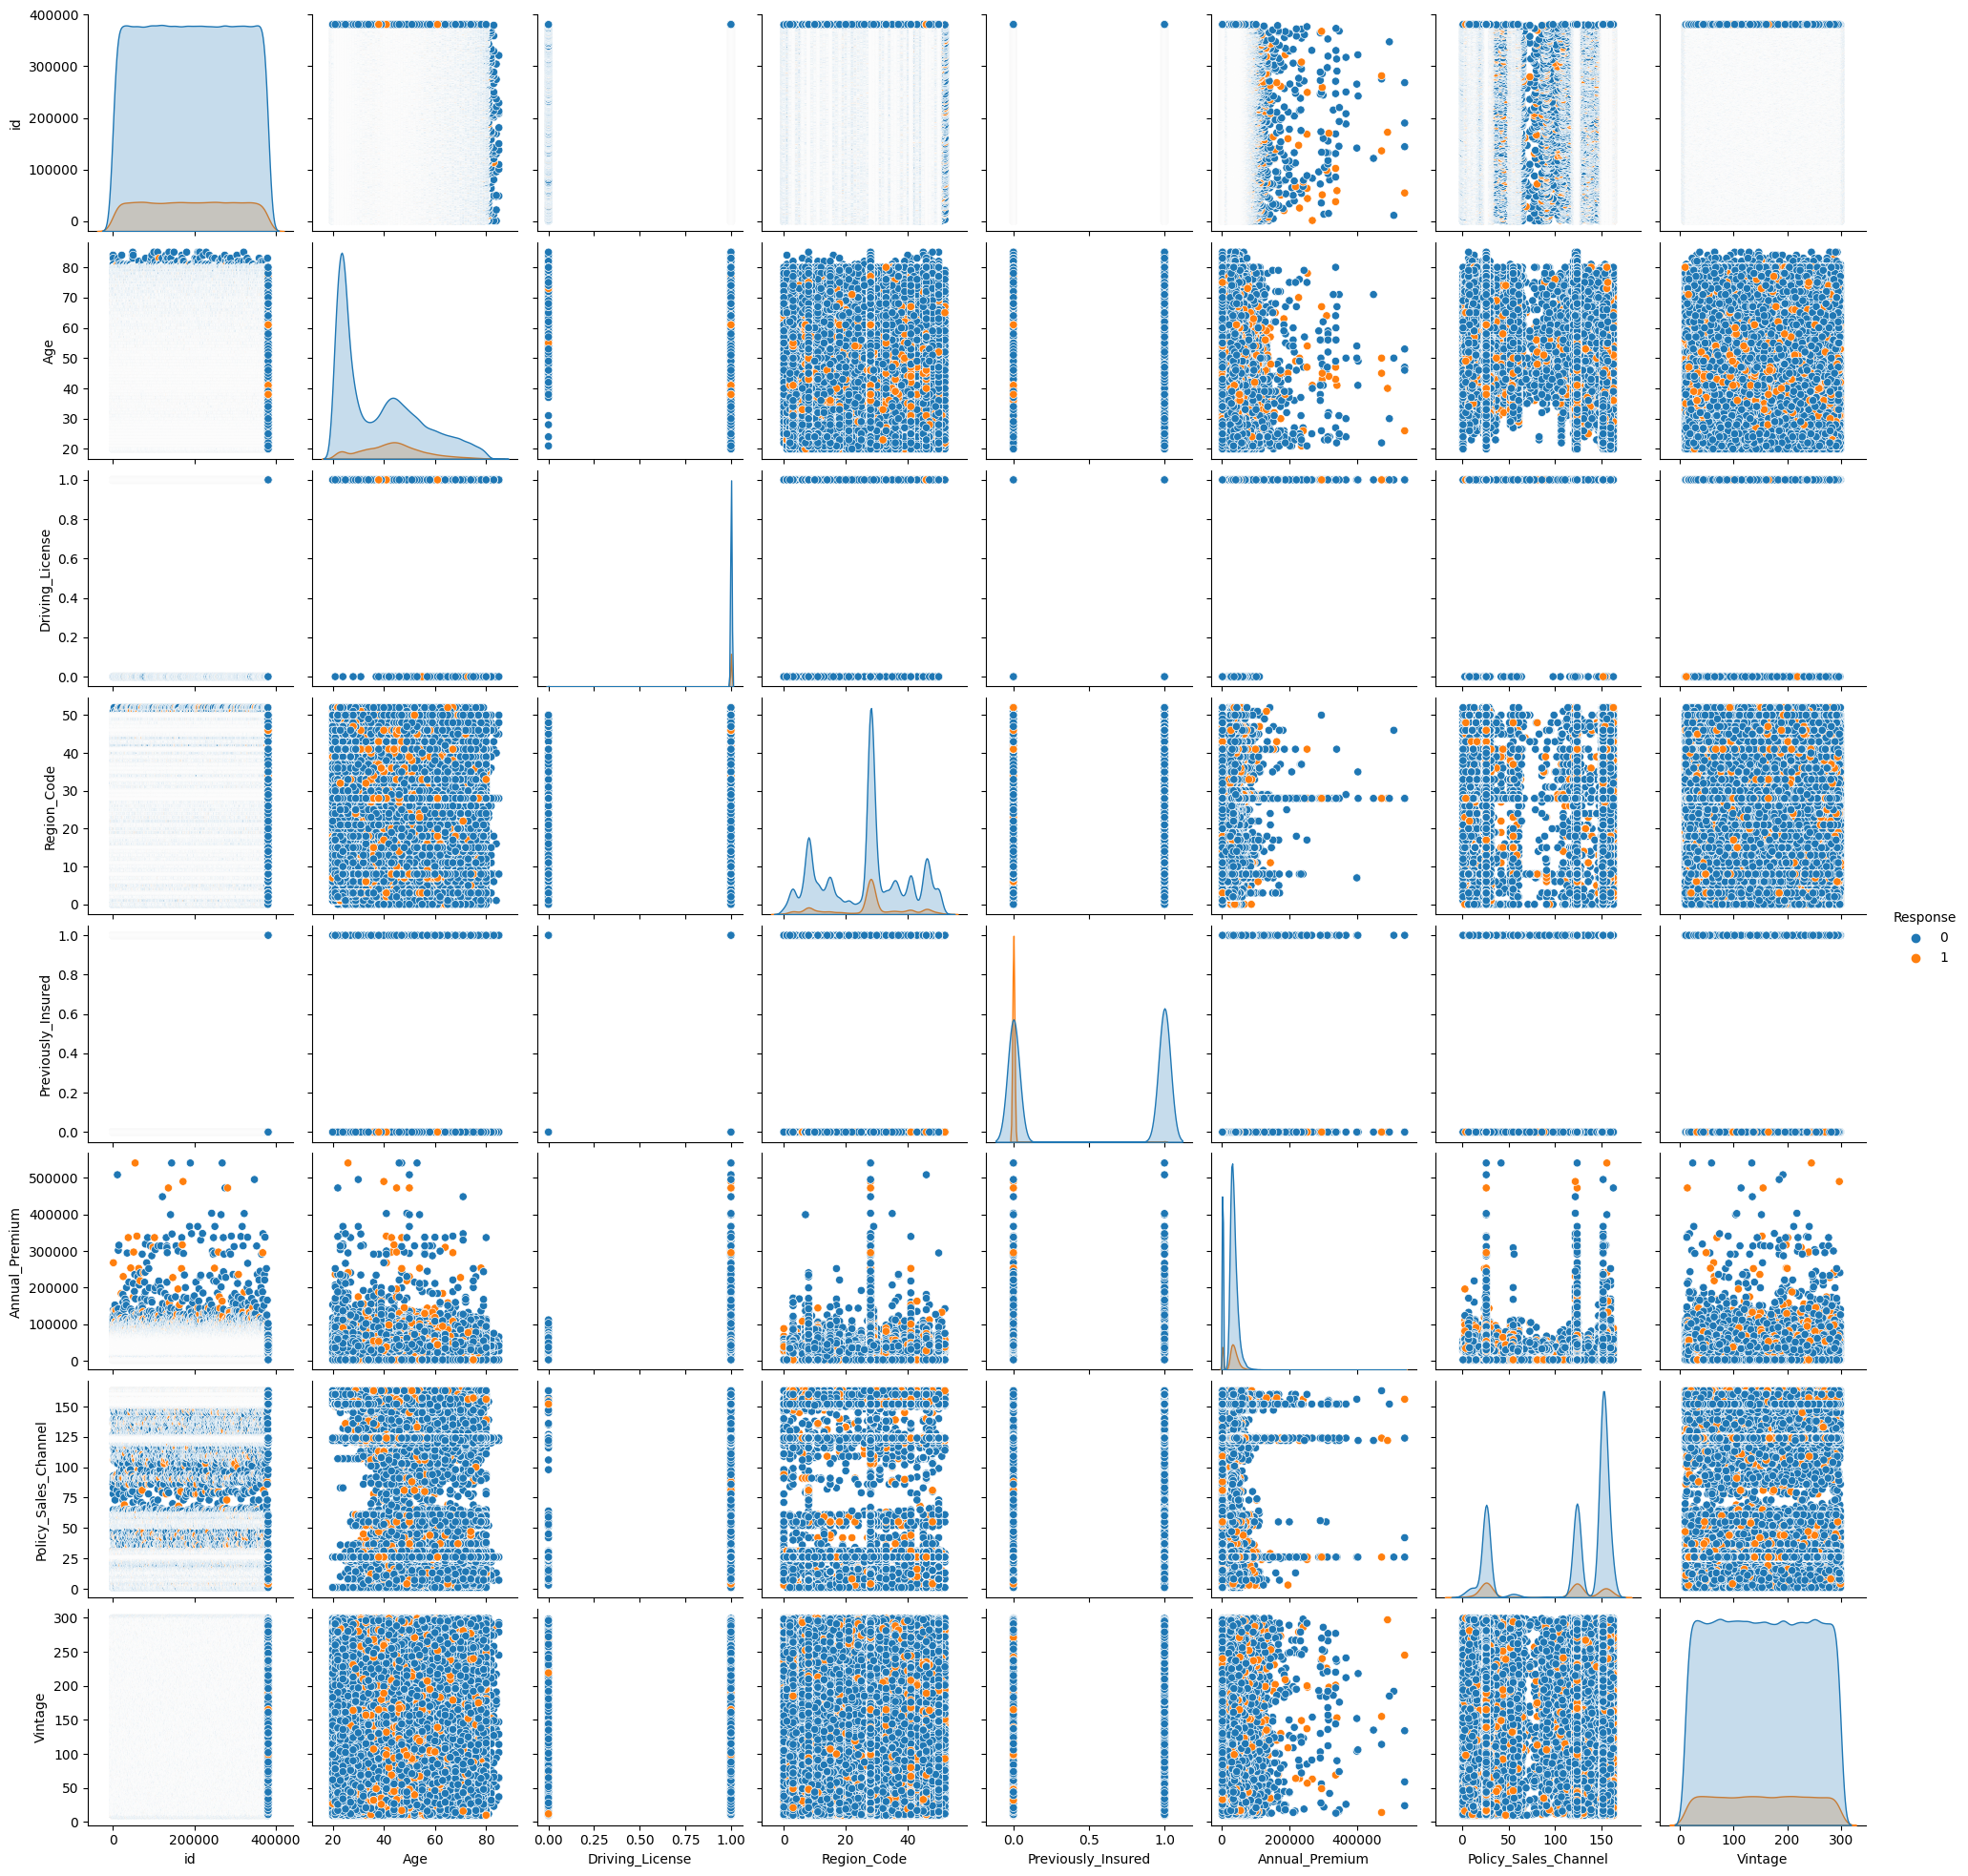

<Figure size 1000x800 with 0 Axes>

<Figure size 2077.49x2000 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))

sns_plot = sns.pairplot(df, diag_kind='kde', hue='Response')
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns
Image(filename='pairplot.png') # Show pairplot as image

## Penjelasan Pair Plot ##
* Berdasarkan pair plot diatas tidak ada korelasi yang menarik terhadap variable target maka dari itu perlu pertimbangan untuk melakukan feature engineering.

* Dari pair plot disamping sekilas dataset ini memiliki kemungkinan imbalance karena hanya condong di “response = 0”


## Insight Tambahan ##

* Kolom age dengan policy sales channel memiliki korelasi negatif yang cukup kuat (-0.58). Hal ini menunjukan orang yang berumur muda lebih mudah untuk terpengaruh oleh asuransi kendaraan yang ditawarkan oleh sales dan sebaliknya, customer berusia lanjut lebih sulit untuk terpengaruh oleh penawaran yang dilakukan sales. Oleh karena itu perlu strategi khusus untuk customer berusia lanjut
*Customer berusia muda cenderung mengambil asuransi kendaraan dengan kemungkinan mereka memiliki penghasilan yang cukup besar, hal ini dapat dilihat dari annual premium yang cukup besar bagi customer berusia muda.
vintage tidak memiliki korelasi terhadap semua kolom, mungkin bisa dilakukan pertimbangan apakah layak untuk drop.

##4. Business Insight##

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis

In [ ]:
# melakukan copy df
df1 = df.copy()
df1.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
# melakukan pengelompokan umur
df1['Age_Group'] = df1['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')


## Business Insight - Age ##

Text(0.5, 1.0, 'Distribution Age Grup')

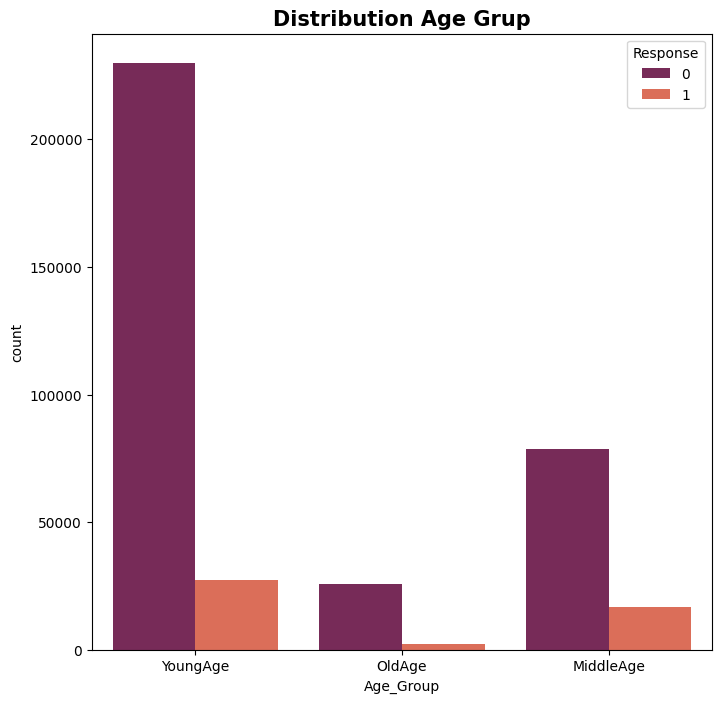

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Age
plt.figure(figsize = (8,8))
sns.countplot(x='Age_Group',hue='Response',data=df1,palette="rocket")
plt.title ("Distribution Age Grup", fontsize = 15, fontweight= "bold" )

Dapat dilihat dari distribusi kelompok umur muda lebih banyak membeli asuransi kesehatan atau kendaraan, dikarenakan pada umur yang lebih muda kemungkinan besar mereka cenderung lebih sadar akan pentingnya perlindungan finansial melalui asuransi. kelompok umur muda atau pertengahan umur sering memiliki kesadaran yang lebih tinggi tentang risiko dan dampak finansial yang dapat timbul dari peristiwa yang tidak terduga.

Hal ini juga didukung oleh protective.com dalam artikelnya yang berjudul “why you should buy life insurance when you are young” yang mengatakan bahwa kelompok umur muda lebih banyak membeli asuransi karena dua faktor sebagai berikut:

* Cheaper & Healthier

Secara umum, semakin muda umur kita maka akan semakin sedikit kita akan membayar premi, karena kelompok umur muda memiliki risiko yang lebih kecil daripada seseorang yang jauh lebih tua secara kondisi kesehatan, karena kelompok umur muda cenderung memiliki kesehatan yang prima dan belum ada penyakit yang kronis sehingga premi asuransi secara signifikan akan lebih rendah pada usia kelompok umur muda.

* Get More Coverage for the Future

Secara coverage kelompok umur muda juga memiliki coverage yang lebih luas di masa depan, karena selain mempunyai life expectancy yang jauh lebih panjang dibandingkan kelompok umur yang lebih tua, kelompok umur muda juga dapat lebih mudah untuk membeli premi asuransi tambahan di masa depan ketika kelompok umur muda menikah dan mempunyai anak


## Rekomendasi Business Insight - Age ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk lebih bisa memfokuskan marketing campaign pada kedua kelompok umur tersebut agar bisa mendapat kan revenue yang maksimal dan bisa memaksimal conversion rate dari kedua kelompok umur tersebut.

## Business Insight - Gender ##

Text(0.5, 1.0, 'Distribution Gender')

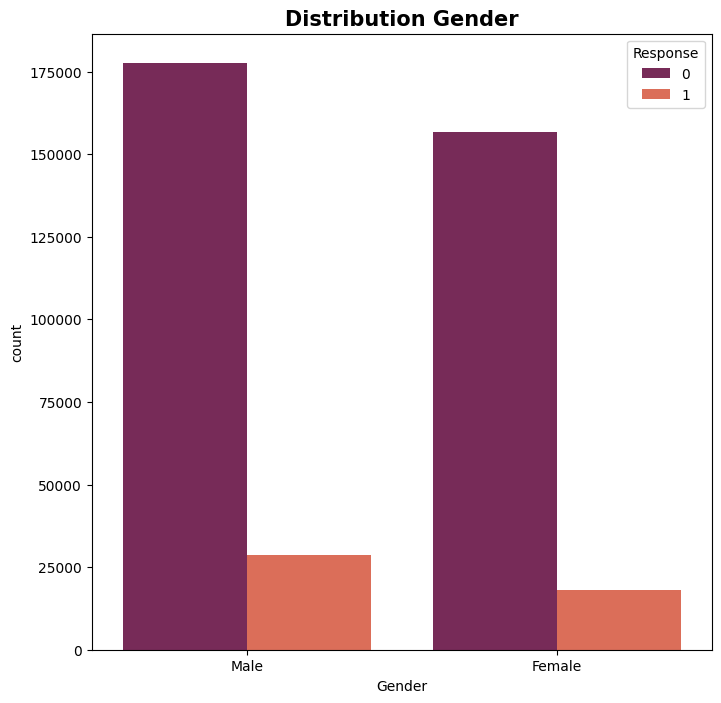

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Gender
plt.figure(figsize = (8,8))
sns.countplot(x='Gender',hue='Response',data=df,palette="rocket")
plt.title ("Distribution Gender", fontsize = 15, fontweight= "bold" )

Dapat dilihat dari grafik bahwa customer pria lebih banyak dibandingkan perempuan karena pria cenderung untuk diasuransikan dan membeli asuransi untuk keamanan jangka panjang dibandingkan perempuan.

Customer pria memiliki jumlah lebih besar daripada customer perempuan juga didukung dari dua penelitian sebagai berikut:

* Penelitian Asuransi Jiwa:

Menurut studi tahun 2021 oleh LIMRA dan Life Happens, hanya 47% wanita yang memiliki polis asuransi jiwa dibandingkan dengan 58% pria. Hal ini disebabkan primary provider secara historis adalah seorang pria yang lebih cenderung mendapatkan polis asuransi melalui pemberi kerja/perusahaan mereka dibandingkan dengan perempuan yang secara statistik penelitian mayoritas belum bekerja penuh waktu untuk memenuhi syarat mendapatkan tunjangan asuransi dari pemberi kerja/perusahaan.
* Penelitian Asuransi Kendaraan:

Menurut penelitian dari AAA Foundation for Traffic Safety,yang meneliti perilaku pengemudi Amerika, pria lebih banyak diasuransikan karena pria cenderung lebih berisiko untuk mengalami kecelakaan. Hal ini disebabkan pria lebih rentan dalam mengalami kecelakaan kendaraan karena faktor seperti perilaku mengemudi yang agresif, mengantuk, mabuk , tidak memakai sabuk pengaman, kelelahan dan faktor lain nya yang tingkat kecelakaan nya lebih tinggi daripada pengemudi perempuan.


## Rekomendasi Business Insight - Gender ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk memfokuskan marketing pada customer pria dibandingkan perempuan, dan meskipun begitu perusahaan juga  bisa melakukan targeted marketing campaign yang secara konten lebih cocok ke perempuan untuk bisa juga memaksimalkan potensi revenue yang bisa didapatkan dari dari customer yang berjenis kelamin perempuan.

## Business Insight - Driving License ##

<Axes: xlabel='Driving_License', ylabel='count'>

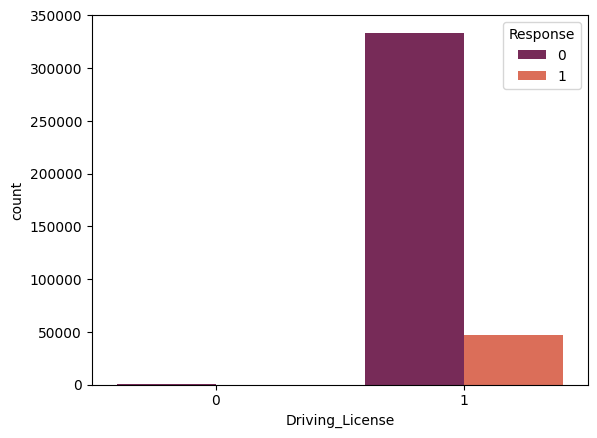

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Driving License
sns.countplot(x='Driving_License',hue='Response',data=df,palette="rocket")

Dapat dilihat dari grafik bahwa customer yang memiliki SIM lebih cenderung tertarik (Response=“1”) membeli asuransi kendaraan dibandingkan dengan customer yang tidak memiliki SIM, karena customer yang memiliki SIM cenderung lebih mengetahui kewajiban dan manfaat dari asuransi kendaraan daripada customer yang tidak memiliki SIM. Selain itu customer yang memiliki SIM tentu nya dapat lebih mudah mengajukan permohonan asuransi daripada customer yang tidak mempunyai SIM.

Customer yang memiliki SIM lebih cenderung tertarik membeli asuransi kendaraan dan mempunyai kemudahan mengajukan asuransi dibandingkan dengan customer yang tidak memiliki SIM juga didukung dari bankrate.com dalam artikel nya yang berjudul  “can you get insurance with no driving license” karena faktor sebagai berikut:

* Kewajiban Secara Hukum

Secara umum asuransi kendaraan diwajibkan secara hukum untuk pemilik kendaraan di sebagian besar negara. Salah satu syarat yang paling utama untuk mendapatkan asuransi kendaraan adalah SIM. Sehingga customer yang memiliki SIM sudah pasti cenderung lebih tahu kewajiban dan manfaat untuk mempunyai asuransi kendaraan sehingga  akan lebih tertarik untuk membeli asuransi kendaraan.
* Proses Pengajuan Asuransi

Mendapatkan asuransi mungkin dapat menjadi proses yang lebih rumit jika kita tidak memiliki SIM. Hal ini menjadikan customer yang tidak memiliki SIM menjadi tidak tertarik memiliki asuransi karena proses yang dilalui cukup rumit serta memakan waktu dan biaya dibandingkan dengan customer yang memiliki SIM.


## Rekomendasi Business Insight - Driving License ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk untuk membuat strategi komunikasi marketing campaign kepada pemegang SIM yang belum mempunyai asuransi kendaraan, untuk melakukan promosi yang dapat mempermudah proses pengajuan asuransi kendaraan (seperti pengajuan asuransi online) agar customer tertarik untuk membeli asuransi.

## Business Insight - Previously Insured ##

<Axes: xlabel='Previously_Insured', ylabel='count'>

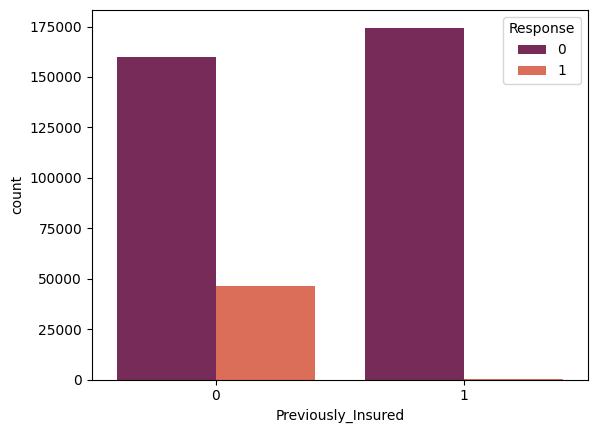

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Previously Insured
sns.countplot(x='Previously_Insured',hue='Response',data=df,palette="rocket")

Dapat dilihat dari grafik bahwa customer yang belum memiliki asuransi kendaraan (Previously_Insured=”0”) cenderung lebih tertarik untuk membeli asuransi (Response=“1”) dibandingkan dengan customer yang sudah memiliki asuransi kendaraan (Previously_Insured=”1”) karena customer yang sudah memiliki asuransi cenderung tidak akan membeli produk asuransi yang sama kembali.

Customer yang belum memiliki asuransi kendaraan cenderung lebih tertarik untuk membeli asuransi dibandingkan dengan customer yang sudah memiliki asuransi kendaraan juga didukung oleh analyticsvidhya.com dalam artikelnya yang berjudul  “Cross-Sell Prediction Using Machine Learning in Python” yang menyatakan bahwa:

* Pada dasarnya customer hanya ingin memiliki satu asuransi kendaraan saja, karena apabila customer sudah memiliki asuransi kendaraan, customer tidak akan mempertimbangkan untuk membeli asuransi kendaraan lain nya karena akan dirasa redundant dan tidak efektif serta efisien dalam segi biaya dan waktu.

* Artinya customer yang sudah memiliki asuransi kendaraan tidak akan berkonversi ke asuransi kendaraan yang ditawarkan oleh perusahaan dalam dataset.

* Dua hal diatas menyebabkan fokus dalam rekomendasi akan lebih berfokus pada customer yang belum memiliki asuransi kendaraan, untuk dapat memaksimalkan usaha strategi komunikasi perusahaan dalam menjangkau potensi revenue yang lebih optimal dari customer yang cenderung lebih tertarik dengan asuransi kendaraan(customer yang belum mempunyai asuransi kendaraan)


## Rekomendasi Business Insight - Previously Insured ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk merekomendasikan untuk melakukan targeted atau personalized content yang berfokus kepada customer yang belum memiliki asuransi kendaraan, dengan cara melakukan campaign yang berfokus pada edukasi keamanan membeli asuransi untuk keamanan jangka panjang agar customer berminat untuk membeli asuransi.

## Business Insight - Vehicle Age ##

Text(0.5, 1.0, 'Distribution vehicle age')

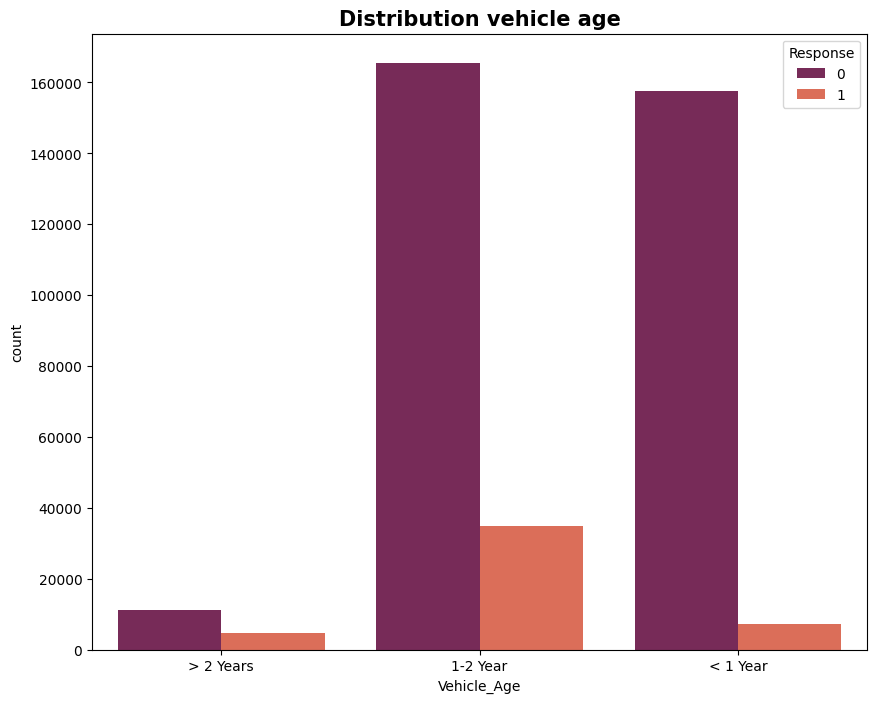

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Vehicle Age
plt.figure(figsize=(10, 8))
sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="rocket")
plt.title ("Distribution vehicle age", fontsize = 15, fontweight= "bold" )

Dapat dilihat dari grafik bahwa customer yang memiliki atau tertarik dengan asuransi merupakan customer yang mempunyai usia kendaraan yang kurang dari 2 tahun (1-2 Year dan < 1 Year), karena mereka akan cenderung lebih merawat kendaraan baru yang dimiliki.

Hal ini juga didukung oleh forbes.com dalam artikelnya yang berjudul “advisor/car-insurance/new-car-replacement” yang menyatakan bahwa kendaraan baru lebih banyak memiliki asuransi, karena hal sebagai berikut:

* Penurunan nilai/Depresiasi nilai kendaraan dapat merugikan customer disaat customer mengalami kecelakaan tak lama setelah customer membeli mobil baru. Perusahaan asuransi kemungkinan besar akan mengganti nilai kendaraan dibawah harga beli karena karena depresiasi dan kecelakaan tersebut, sehingga klaim yang dibayarkan tidak cukup untuk mengcover nilai kendaraan customer, sehingga disarankan untuk mempunyai asuransi kendaraan, seperti contoh nya adalah “asuransi penggantian mobil baru”.

* Asuransi penggantian mobil baru memberi customer uang untuk mobil baru dengan merek dan model yang sama (dikurangi deductibles) dan alih nilai depresiasi total kendaraan customer. Hal ini membuat customer lebih tertarik karena kendaraan lebih terjamin saat menggunakan asuransi.


## Rekomendasi Business Insight - Vehicle Age ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk melakukan targeted atau personalized content yang berfokus kepada customer dengan dengan usia kendaraan kurang dari 2 tahun (1-2 Year dan < 1 Year), karena mereka akan lebih tertarik untuk merawat kendaraan,dikarenakan customer cenderung akan merawat kendaraan baru yang dimiliki sehingga hal ini dapat dimanfaatkan oleh perusahaan untuk gencar melakukan promosi asuransi pada customer yang baru saja membeli kendaraan.


## Business Insight - Vehicle Damage ##



<Axes: xlabel='Vehicle_Damage', ylabel='count'>

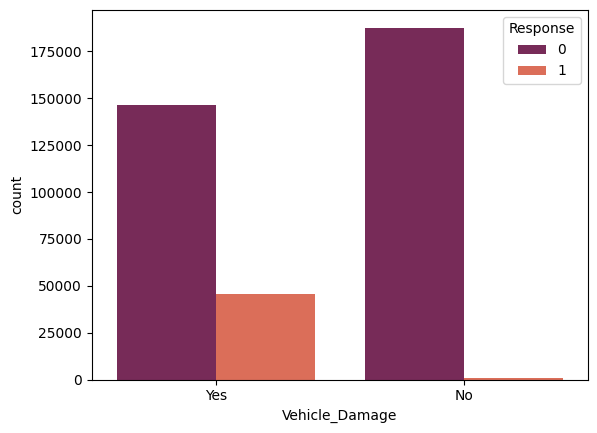

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Vehicle Damage
sns.countplot(x='Vehicle_Damage',hue='Response',data=df,palette="rocket")

Dapat dilihat dari grafik bahwa customer yang kendaraan nya pernah mengalami kerusakan (Vehicle_Damage=”1”) cenderung lebih tertarik untuk membeli asuransi (Response=“1”) dibandingkan dengan customer yang kendaraan nya belum pernah mengalami kerusakan (Vehicle_Damage=”1”) karena customer yang kendaraan nya pernah mengalami kerusakan cenderung lebih mengetahui biaya yang perlu dikeluarkan saat kendaraan mengalami kerusakaan apabila menggunakan asuransi dan tidak menggunakan asuransi.

Hal ini juga didukung oleh analyticsvidhya.com dalam artikelnya yang berjudul  “Cross-Sell Prediction Using Machine Learning in Python” yang menyatakan bahwa:

* Customer yang kendaraan nya pernah rusak cenderung lebih memiliki pengalaman dan pengetahuan dari segi cost yang harus dikeluarkan untuk memperbaiki kendaraan nya. Dari segi pengalaman customer, apabila menggunakan asuransi, cost yang dikeluarkan jauh lebih murah daripada saat tidak menggunakan asuransi, karena saat menggunakan asuransi kendaraan, customer dapat mendapatkan klaim dari asuransi disaat kendaraan mereka rusak, sedangkan apabila tidak menggunakan asuransi, customer akan menanggung biaya perbaikan nya sendiri (yang jauh lebih mahal).

* Sehingga customer yang kendaraan nya pernah rusak akan lebih berpeluang untuk berkonversi ke asuransi kendaraan yang ditawarkan oleh perusahaan dalam dataset.


## Rekomendasi Business Insight - Vehicle Damage ##

Berdasarkan insight diatas, perusahaan direkomendasikan untuk melakukan targeted atau personalized content yang berfokus kepada customer yang kendaraan nya pernah mengalami kerusakaan namun belum mempunyai asuransi kendaraan, sehingga customer akan semakin banyak yang berkonversi.

# **Previously On Stage 2 - Data Pre-Processing**

## 1. Data Cleansing

## Handling Missing Value ##

In [ ]:
df1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Age_Group               0
dtype: int64

Dapat dilihat dari hasil function isnull().sum() di atas, tidak ada data yang memiliki missing values. Sehingga tidak perlu dilakukan handling terhadap missing value pada bagian ini.

## Handle Duplicated Data ##

In [ ]:
df1.duplicated(subset= "id",keep = False).sum()

0

Begitu juga dapat dilihat dari hasil function duplicated().sum() di atas, tidak ada data yang memiliki data duplikat. Sehingga tidak perlu dilakukan handling terhadap duplicated data pada bagian ini.

## Handle Outliers ##

Sesuai informasi dan insight yang didapatkan pada EDA, kami akan mencoba melakukan Handling Outliers dengan menggunakan IQR dan QQ Plot pada feature Annual_Premium

In [ ]:
# Untuk mencoba melakukan handling outliers menggunakan IQR
df_outliers = pd.read_csv('train.csv')
print(f'Jumlah baris sebelum melakukan filtering outlier adalah: {len(df_outliers)}')

Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = (df['Annual_Premium'] >= low_limit) & (df['Annual_Premium'] <= high_limit)
df_outliers = df_outliers[filtered_entries]

print(f'Jumlah baris setelah melakukan filtering outlier adalah: {len(df_outliers)}')

Jumlah baris sebelum melakukan filtering outlier adalah: 381109
Jumlah baris setelah melakukan filtering outlier adalah: 370789


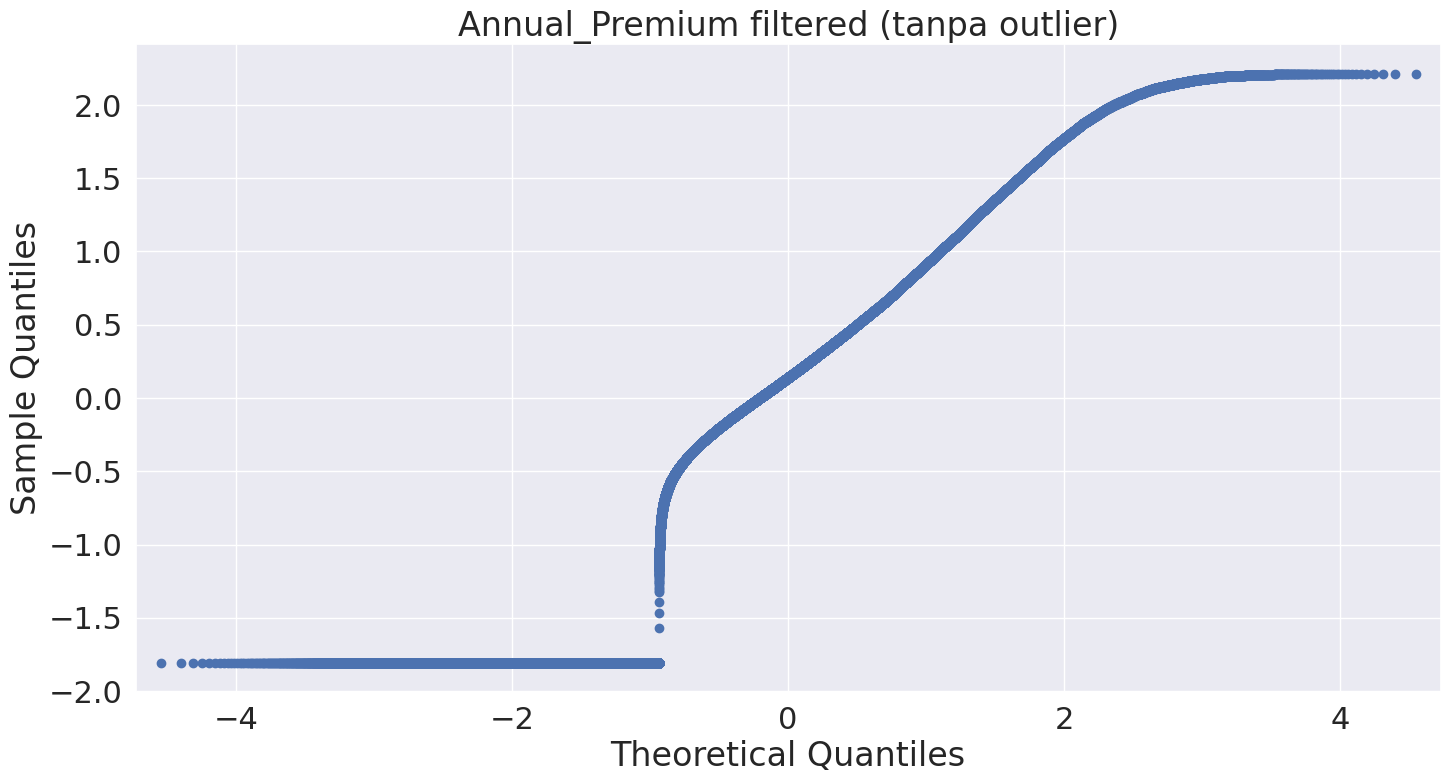

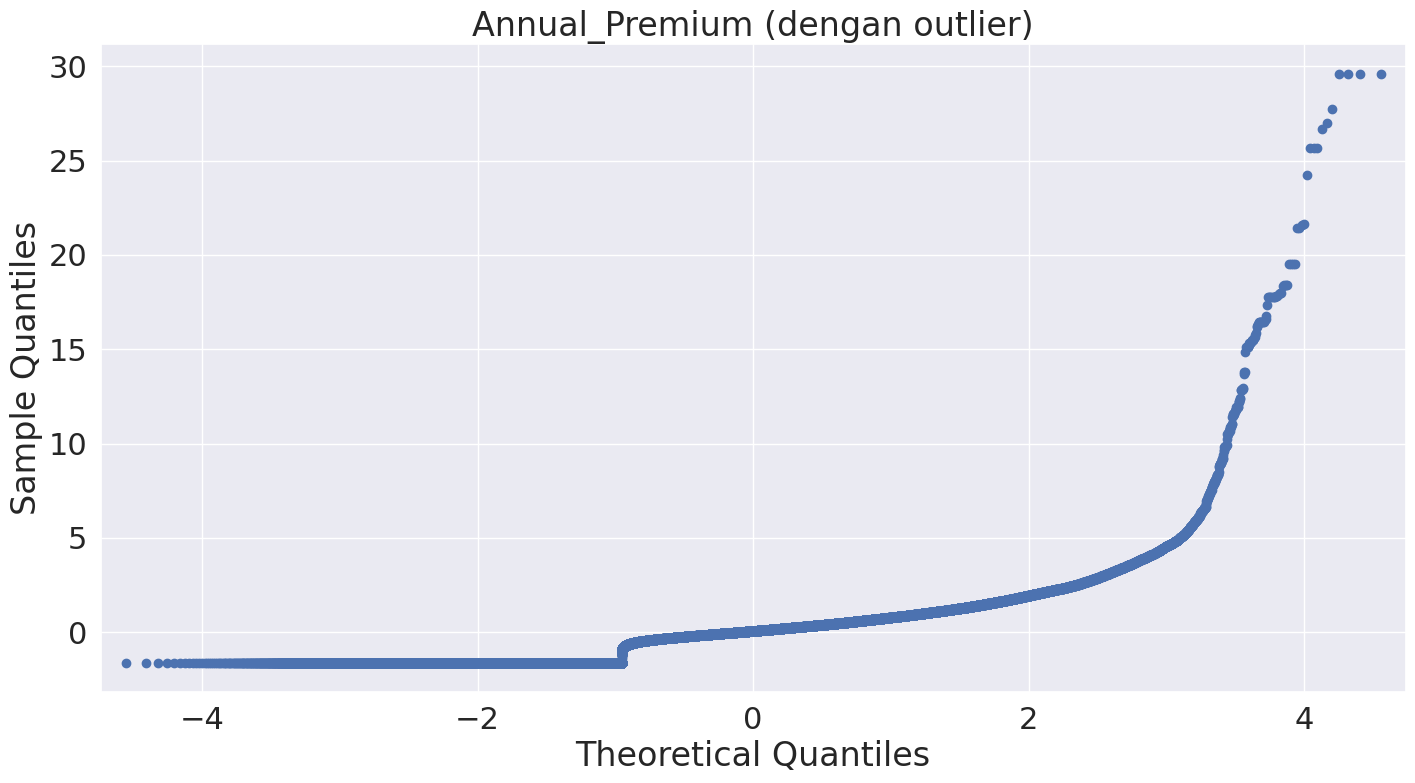

In [ ]:
# Untuk melakukan visualisasi outliers Annual_Premium dengan dan tanpa menggunakan outliers
import statsmodels.api as sm
import scipy.stats as st
plt.rcParams['figure.figsize'] = (15,8)
sns.set(font_scale=2)

sm.qqplot(df_outliers['Annual_Premium'],fit=True,dist=st.norm)
plt.title("Annual_Premium filtered (tanpa outlier)")

sm.qqplot(df['Annual_Premium'],fit=True,dist=st.norm)
plt.title("Annual_Premium (dengan outlier)")
plt.show()

Dari observasi dan analisis IQR dan QQ plot diatas, dapat disimpulkan bahwa outlier Annual_Premium merupakan collective outlier. Collective outlier merupakan kelompok titik data yang secara kolektif menyimpang secara signifikan dari keseluruhan distribusi kumpulan data (Dalam hal ini distribusi dari feature Annual_Premium).

Dalam kasus pada dataset ini outlier yang ada pada Annual_Premium masih wajar terjadi di dunia nyata, karena Annual Premium tiap nasabah yang berbeda-beda dipengaruhi banyak sekali variabel lainnya seperti Loan (apakah nasabah memiliki pinjaman atau tidak), Jumlah tanggungan keluarga,Jenis Pekerjaan, Jenis Kendaraan, Merk Kendaraan,Jumlah mobil yang dimiliki nasabah dan lain lain.

Sehingga berdasarkan alasan diatas, tidak akan dilakukan handling outliers lebih lanjut pada project ini.

## 2. Feature Engineering

## Adding Age_Group

In [ ]:
# melakukan pengelompokan umur
df1['Age_Group'] = df1['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')
df1.head(1)


id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1   Male   44                1         28.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   

   Response Age_Group  
0         1  YoungAge

## Data Encoding


In [ ]:
# melakukan encoding data
df2= df1.copy()
df2['Gender'] = df2['Gender'].map({'Female':1, 'Male':0})
df2['Vehicle_Damage'] = df2['Vehicle_Damage'].map({'Yes':1, 'No':0})
df2['Vehicle_Age'] = df2['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
df2['Age_Group'] = df2['Age_Group'].map({'YoungAge':0, 'MiddleAge': 1, 'OldAge': 2})


## Feature Correlation

<Axes: >

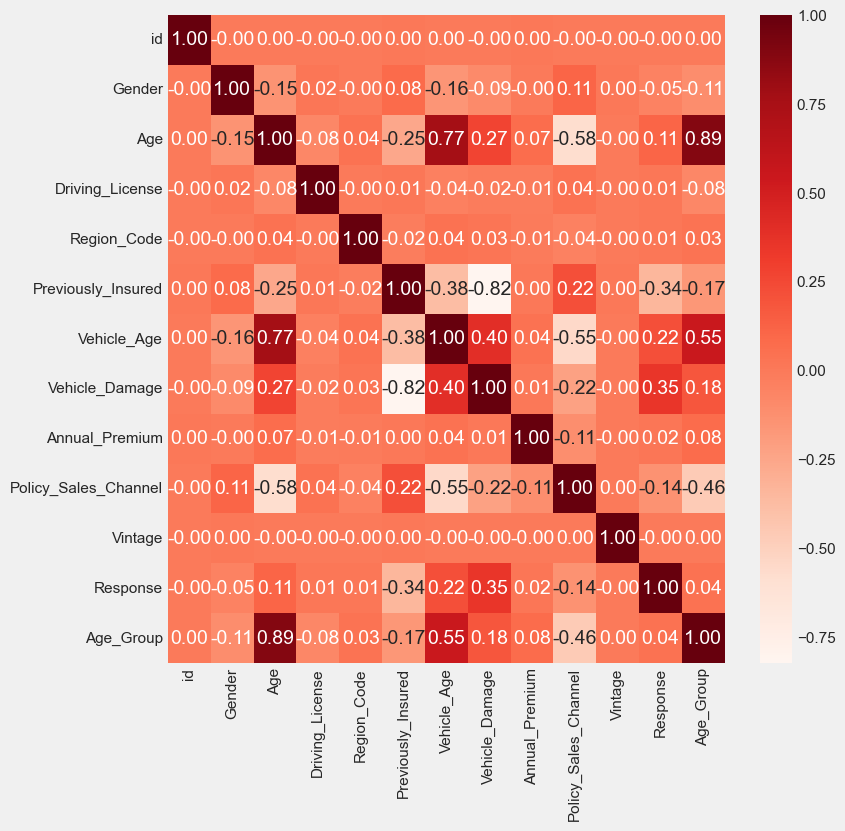

In [ ]:
# melihat korelasi antar kolomfeature = df2.select_dtypes([])
plt.figure(figsize=(8, 8))
sns.heatmap(df2.corr(), cmap='Reds', annot=True, fmt='.2f')


## Multicollinearity with VIF

In [ ]:
#membuat function untuk menghitung VIF
def cal_vif(df2):
   vif = pd.DataFrame()
   vif["variable"] = df2.columns
   vif["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
   return(vif)

In [ ]:
cal_vif(df2[[i for i in df2.describe().columns if i not in ['Response']]])

variable        VIF
0                     id   3.978256
1                 Gender   1.900596
2                    Age  66.661612
3        Driving_License  63.508367
4            Region_Code   4.958937
5     Previously_Insured   5.727772
6            Vehicle_Age   7.002158
7         Vehicle_Damage   6.355590
8         Annual_Premium   4.185201
9   Policy_Sales_Channel   8.086900
10               Vintage   4.374682
11             Age_Group   7.787739

## Feature Selection

In [ ]:
# melakukan feature selection
X= df2[[ 'Gender','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
     'Annual_Premium', 'Age_Group']]
y = df2[["Response"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3 , random_state= 42)


Pada bagian feature selection ini, kami menentukan feature yang akan dipilih berdasarkan uji statistik, EDA, heatmap terbaru yang sudah dilakukan encoding, dan multicollinearity. Sehingga kami hanya akan mengambil fitur fitur yang memiliki korelasi yang penting dengan target dan membuang fitur yang kurang relevan. Hal-hal yang dilakukan pada feature selection adalah sebagai berikut:

- Tidak memilih/Drop feature "id" di feature selection karena feature ini hanya merepresentasikan id dari customer dan tidak mempengaruhi prediksi dari model machine learning.
- Tidak memilih/Drop feature "Age" dan "Driving_License"di feature selection karena feature ini mempunyai Multicollinearity yang tinggi sehingga tidak lulus uji multikolienaritas dan kami akan drop pada project ini.
- Tidak memilih/Drop feature "Policy_Sales_Channel" dan "Region_Code" di feature selection karena feature ini memiliki terlalu banyak nilai unik/kategori sehingga tidak dapat terlalu diambil insight atau informasi nya, karena dataset tidak memiliki informasi Policy_Sales_Channel (Apa kategori channel dari data numerik yang ada pada dataset) dan Region_Code (Berasal dari mana Region_Code dari data numerik yang ada pada dataset). Sehingga dua feature ini menjadi tidak terlalu bermanfaat dari model machine learning yang akan dibuat.
- Tidak memilih/Drop feature "Vintage" di feature selection .karena berdasarkan heatmap, sebelum dan sesudah menggunakan feature engineering, tidak relevan terhadap fitur-fitur lain. Feature Vintage adalah variabel yang menunjukkan usia polis asuransi customer di perusahaan pada dataset atau berapa lama ccustomer telah bersama perusahaan asuransi yang ada pada dataset. Dapat kita lihat bahwa usia polis asuransi customer masih berusia di bawah 1 tahun dan juga feature Vintage ini berdistribusi uniform. Feature Vintage bisa sangat berguna pada dunia nyata jika usia polis asuransi memiliki nilai lebih dari setahun sebagai perbandingan. Namun pada case ini, karena feature Vintage mempunyai usia dibawah 1 tahun, sehingga feature ini tidak terlalu berguna dan akan kami drop juga pada bagian feature selection ini
- Memilih fitur yang sudah di encode atau di kategorikan seperti age_group

Kesimpulan dari feature selection yang diatas, feature selection yang kami pilih untuk project ini adalah:

- Gender
- Previously_Insured
- Vehicle_Age
- Vehicle_Damage
- Annual_Premium
- Age_Group
- Response (*Feature Target)


## Handle Imbalance Data

In [ ]:
# check imbalance data
y_train["Response"].value_counts()

Response
0    234204
1     32572
Name: count, dtype: int64

- untuk mengurangi jumlah sampel dari kelas mayoritas sehingga seimbang dengan jumlah sampel dari kelas minoritas. Ini dilakukan dengan menghapus sejumlah sampel acak dari kelas mayoritas hingga proporsi kelas menjadi lebih seimbang.
- Ketidakseimbangan kelas dapat menyebabkan model cenderung memprediksi kelas mayoritas sepanjang waktu, yang mengurangi kemampuan model untuk mengklasifikasikan kelas minoritas. Dengan melakukan Random Under Sampling, model memiliki kesempatan yang lebih baik untuk mempelajari fitur-fitur kelas minoritas.


## Sampling

In [ ]:
# karena data imbalance kita akan melakukan sampling karena imbalance yang ekstrim
ros = RandomUnderSampler(random_state=42)
X_train, y_train= ros.fit_resample(X_train, y_train)
y_train['Response'].value_counts()


Response
0    32572
1    32572
Name: count, dtype: int64

## Normalization

In [ ]:
# melakukan normalize menggunakan standart scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [ ]:
X_train.head(2)

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  Annual_Premium  \
0 -0.865622           -0.595458    -1.331279        0.642062        -0.31801   
1  1.155238            1.679379    -1.331279       -1.557481         0.45796   

   Age_Group  
0  -0.700921  
1  -0.700921

##Feature Tambahan ##

1. Feature "Loan"


Feature Loan dapat ditambahkan untuk melihat apakah nasabah memiliki pinjaman atau tidak. Feature ini dapat bermanfaat untuk melihat pengaruh Loan terhadap keputusan customer apakah mereka akan tertarik menggunakan Asuransi Kendaraan atau tidak. Feature Loan menjadi bermanfaat, karena pertimbangan bahwa nasabah yang sudah memiliki loan, akan cenderung tidak tertarik mengambil asuransi kendaraan karena akan ada biaya tambahan yang harus dikeluarkan untuk menggunakan Asuransi Kendaraan, dan vice versa.

2. Feature "Dependent"


Feature "Dependent" atau Jumlah Tanggungan Keluarga dapat ditambahkan, karena feature ini bisa menjadi pertimbangan bagi customer apakah akan memutuskan menggunakan Asuransi Kendaraan atau tidak karena akan ada biaya tambahan yang harus dikeluarkan apabila memiliki tanggungan keluarga, dibandingkan customer yang belum memiliki tanggungan.

3. Feature "Occupation"


Feature Occupation atau Jenis Pekerjaan, dapat juga ditambahkan sebagai feature tambahan, karena feature ini  akan melihat pengaruh jenis pekerjaan terhadap keputusan customer untuk menggunakan Asuransi Kendaraan atau tidak. Nanti nya feature ini dapat melihat, jenis pekerjaan apa yang memiliki kecenderungan yang tinggi dan tidak untuk jumlah customer yang tertarik menggunakan Asuransi Kendaraan.

4. Feature "Vehicle_Type"


Feature Vehicle_Type atau Jenis Kendaraan, dapat ditambahkan sebagai feature tambahan karena featur ini akan berguna untuk melihat pengaruh jenis kendaraan yang dimiliki oleh customer terhadap keputusan customer yang akan menggunakan Asuransi Kendaraan atau tidak. Pada dunia nyata, biasa nya tipe kendaraan saat berpengaruh terhadap polis asuransi yang akan dibayar. Biasa nya semakin besar size kendaraan akan semakin besar polis asuransi yang dibayarkan, karena resiko kendaraan besar (Seperti jenis kendaraan Hatchback, Truck, MPV, SUV, dll) mengalami kecelakaan/kerusakan lebih besar dibandingkan kendaraan kecil (Seperti jenis kendaraan Sedan, Lowrider, Muscle car, dll). Nantinya akan diliat jenis kendaraan apa yang memiliki kecenderungan yang tinggi dan tidak untuk jumlah customer yang tertarik menggunakan Asuransi Kendaraan.

5. Feature "Vehicle_Brand"


Feature Vehicle_Brand atau Merk Kendaraan dapat ditambahkan sebagai feature tambahan karena feature ini akan berguna untuk melihat pengaruh merk kendaraan yang dimiliki oleh customer terhadap keputusan customer yang akan menggunakan Asuransi Kendaraan atau tidak. Feature ini dapat bermanfaat karena customer yang mempunyai merk kendaraan mewah, cenderung lebih tertarik untuk menggunakan asuransi kendaraan karena asuransi kendaraan dapat meningkatkan rasa aman dan nyaman mengingat merk kendaraan yang mahal tentu nya harga kendaraannya dan pajak nya juga akan bernilai tinggi, daripada kendaraan yang mempunyai merk dibawah merek mahal. Nantinya akan diliat jenis kendaraan apa yang memiliki kecenderungan yang tinggi dan tidak untuk jumlah customer yang tertarik menggunakan Asuransi Kendaraan.

6. Feature "Number_Vehicle_Owned"


Feature "Number_Vehicle_Owned" atau Jumlah Mobil yang Dimiliki oleh Customer dapat ditambahkan sebagai feature tambahan karena feature ini akan berguna untuk melihat pengaruh jumlah kendaraan yang dimiliki oleh customer terhadap keputusan customer yang akan menggunakan Asuransi Kendaraan atau tidak. Hal ini disebabkan karena ketika customer memiliki banyak kendaraan, tentunya ada biaya lain yang perlu dikeluarkan dan menggunakan Asuransi Kendaraan akan menambah biaya. Oleh karena itu feature ini cukup penting untuk melihat pengaruhnya terhadap keputusan customer untuk menggunakan Asuransi Kendaraan atau tidak

7. Feature "Net_Income"


Feature "Net_Income" atau Besar Pendapatan yang dimiliki customer dapat dijadikan feature tambahan karena feature ini akan berguna untuk melihat pengaruh besar kecilnya pendapatan individu terhadap keputusan customer apakah akan menggunakan Asuransi Kendaraan atau tidak. Hal ini disebabkan kemampuan customer untuk membeli produk asuransi dapat dipengaruhi oleh berapa banyak pendapatan yang mereka peroleh per bulan karena tentunya semakin tinggi pendapatan yang dihasilkan per bulannya semakin leluasa customer menggunakan uangnya membeli produk asuransi kendaraan

8. Feature "Payment_Method"


Feature "Payment_Method" atau Metode Pembayaran saat customer membeli kendaraan dapat dijadikan feature tambahan karena feature ini akan berguna untuk melihat seberapa besar pengaruh cara bayar customer saat membeli kendaraan terhadap keputusan customer apakah akan menggunakan Asuransi Kendaraan atau tidak. Hal ini disebabkan ketika customer memiliki kendaraan yang belum lunas pembayarannya, mereka cenderung untuk menjaga kendaraan nya agar tidak mengalami kerusakan, yang disebabkan karena ketika kendaraan rusak, maka akan ada biaya tambahan lagi yang dikeluarkan. Akan menjadi lebih menarik lagi jika kita dapat melihat bagaimana kecenderungan customer yang masih memiliki cicilan kendaraan terhadap ketertarikan mereka untuk membayar asuransi kendaraan tiap bulan.

# **Stage 3 - Machine Learning Evaluation & Supervised Learning**

## Referensi Modeling Machine Learning dan Hyperparameter Tuning

Untuk mempermudah pemilihan model machine learning dan hyperparameter tuning yang akan digunakan pada project ini, kami melakukan riset dan pada akhir nya mengacu pada dua penelitian sebagai berikut untuk penentuan model dan hyperparameter tuning yang akan dilakukan.


1. Paper "A Classification Problem: Health Insurance Cross Sell Prediction" - University of San Diego


Pada penelitian di paper "A Classification Problem: Health Insurance Cross Sell Prediction" yang dilakukan oleh University of San Diego, dataset dan problem yang dipakai pada penelitian tersebut adalah dataset yang sama yang dipakai pada project ini, sehingga penelitian ini dapat dinilai akurat dalam memilih model yang baik untuk jenis dataset yang sama. Paper ini menyatakan bahwa modelling yang baik untuk dipilih pada project dengan dataset health insurance diantara nya adalah model Logistic Regression, XGBoost, Decision Tree dan Random Forrest


Penelitian ini dapat diakses pada link:

https://github.com/minsu0816/ADS505-HealthCareCrossSelling/blob/main/ADS-505-Team6-JupyterNotebook-WrittenReport.pdf


2. Journal "Comparative Analysis of Building Insurance Prediction Using Some Machine Learning Algorithms" - University of Electronic Science and Technology of China

Sebagai tambahan, kami juga mencoba untuk menambah referensi dengan penelitian di journal ""Comparative Analysis of Building Insurance Prediction Using Some Machine Learning Algorithms" yang dilakukan pleh University of Electronic Science and Technology of China. Problem yang di handle dalam penelitian ini kurang lebih sama dengan project yang saat ini dilakukan sehingga penelitian ini dapat dinilai akurat dalam memilih model yang baik untuk project ini. Journal ini menyatakan bahwa modelling yang baik untuk dipipilih dalam melakukan preiksi dengan menggunakan machine learning algorithms diantara nya adalah model Naive Bayes dan KNN

Penelitian ini dapat diakses pada link:

 https://www.academia.edu/80341307/Comparative_Analysis_of_Building_Insurance_Prediction_Using_Some_Machine_Learning_Algorithms





## 1. Modeling Machine learning

Berdasarkan referensi diatas dan pembelajaran yang telah kami lakukan pada bootcamp, kami akan mencoba berbagai model pembelajaran ML pada kumpulan data untuk melihat kinerja masing-masing model.
*   Logistic Regression
*   XGBoost
*   Decision Tree
*   Random Forest
*   Naive Bayes
*   KNN

* **Precision :**  Precision adalah rasio prediksi True Positive terhadap jumlah total prediksi Positive.

* **Recall :**  Recall adalah rasio prediksi True positif terhadap jumlah total kasus positif sebenarnya

* **F1-Score :**  menghitung keseimbangan mean dari precision dan recall

* **Confusion Matrix :** Matriks konfusi menunjukkan jumlah prediksi True Positive, False positive, True Negative, dan False Negative yang dibuat oleh model.

* **ROC Curve**: Kurva karakteristik pengoperasian penerima, atau kurva ROC, adalah plot grafis yang menggambarkan kemampuan diagnostik sistem pengklasifikasi binary karena ambang diskriminasinya bervariasi. Kurva ROC dibuat dengan memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) pada berbagai pengaturan threshold. true positive Rate (TPR) juga dikenal sebagai sensitivitas, perolehan, atau probabilitas deteksi dalam pembelajaran mesin. False positive Rate juga dikenal sebagai probabilitas alarm palsu dan dapat dihitung sebagai (1 − spesifisitas).

* **Classification report :** Visualisasi laporan klasifikasi menampilkan score precision, recall, F1, dan dukungan untuk model. Untuk mendukung interpretasi dan deteksi masalah yang lebih mudah, laporan ini mengintegrasikan skor numerik dengan heatmap.

- Untuk dataset ini kita memfokuskan metric evaluasi recall score, karena ingin meningkatkan conversion rate sebanyak mungkin untuk mendapatkan potensial user


In [ ]:
models = [
    ['Logistic Regression', LogisticRegression(random_state= 42)],
    ['XGB', XGBClassifier(tree_method = 'gpu_hist', verbosity = 0)],
    ['Decision Tree', DecisionTreeClassifier(random_state=42)],
    ['Random Forest', RandomForestClassifier(random_state=42)],
    ['Naive Bayes', GaussianNB()],
    ['KNN', KNeighborsClassifier()]
]

In [ ]:
#membuat function untuk mengukur metric evaluasi model
def eval_classification(model):
    model_name = []
    # recall
    cv_recall_test = []
    training_recall = []
    # precision
    cv_precision_test = []
    training_precision = []
    # F1
    cv_f1_test = []
    training_f1 = []
    # ROC AUC
    cv_roc_auc_test = []
    training_roc_auc = []

    for name, model in models:
        model.fit(X_train, y_train)
        model_name.append(name)

        #score
        scoring= ['recall', 'precision', 'f1', 'roc_auc']

        #CV
        cv_score = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, n_jobs = -1)

        # train
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]

        training_recall.append(recall_score(y_train,y_pred_train))
        training_precision.append(precision_score(y_train, y_pred_train))
        training_f1.append(f1_score(y_train, y_pred_train))
        training_roc_auc.append(roc_auc_score(y_train, y_pred_proba_train))

        #test
        cv_recall_test.append(abs(cv_score['test_recall']).mean())
        cv_precision_test.append(abs(cv_score['test_precision']).mean())
        cv_f1_test.append(abs(cv_score['test_f1']).mean())
        cv_roc_auc_test.append(abs(cv_score['test_roc_auc']).mean())

    return pd.DataFrame({
        'Model': model_name,
        'Training Recall' : training_recall,
        'CV Recall test': cv_recall_test,
        'Training Precision' : training_precision,
        'CV Precision test' : cv_precision_test,
        'Training F1' : training_f1,
        'CV F1 test' : cv_f1_test,
        'Training AUC_ROC' : training_roc_auc,
        'CV AUC_ROC test' : cv_roc_auc_test,
    })

In [ ]:
eval_classification(models)

Model  Training Recall  CV Recall test  Training Precision  \
0  Logistic Regression         0.976114        0.976053            0.703874   
1                  XGB         0.945045        0.931598            0.723244   
2        Decision Tree         0.959536        0.743000            0.922736   
3        Random Forest         0.979430        0.757000            0.906874   
4          Naive Bayes         0.976882        0.976882            0.703976   
5                  KNN         0.738119        0.678865            0.785866   

   CV Precision test  Training F1  CV F1 test  Training AUC_ROC  \
0           0.703875     0.817936    0.817911          0.833410   
1           0.713667     0.819400    0.808197          0.853223   
2           0.705695     0.940776    0.723849          0.990058   
3           0.707062     0.941756    0.731166          0.983973   
4           0.703989     0.818274    0.818279          0.811172   
5           0.722357     0.761244    0.699929          0.816540   

   CV AUC_ROC test  
0         0.833381  
1         0.830290  
2         0.721467  
3         0.798133  
4         0.811362  
5         0.747553

Dari modeling diatas kita bisa mengetahui bahwa model Logistic Regression dan naive bayes memiliki score recall yang baguss sesuai dengan tujuan bisnis yang sudah ditentukan yaitu mencari true positive sebanyak - banyaknya. maka pilihan model logistic regression dan naive bayes adalah opsi terbaik dengan score yang hampir mirip yaitu 97% dengan score auc roc yang stabil juga, sehingga memiliki kecenderungan overfit/underfit yang sangat kecil sekali. meskipun begitu kita akan mencoba mengoptimasi kedua model tersebut menggunakan hyperparameter tuning.

# Hyperparameter logistic regression

In [ ]:
logreg = LogisticRegression(random_state= 42)

param_logreg = {'penalty': ['l1','l2'],
                'C': [float(x) for x in np.linspace(0.25, 0.5, 1)],
                'fit_intercept' : [True,False]}

logreg_rs = RandomizedSearchCV(logreg, param_distributions= param_logreg, scoring= 'recall',
                               random_state=42, cv=10, n_jobs=-1, verbose=1)

logreg_rs.fit(X_train, y_train)
print(logreg_rs.best_params_)
print(logreg_rs.score(X_train, y_train), logreg_rs.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'penalty': 'l2', 'fit_intercept': False, 'C': 0.25}
0.9768819845265873 0.9768820539149472


Score train sebelum tuning logreg
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32572
           1       0.70      0.98      0.82     32572

    accuracy                           0.78     65144
   macro avg       0.83      0.78      0.77     65144
weighted avg       0.83      0.78      0.77     65144

Score test sebelum melakukan tuning logreg
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100195
           1       0.25      0.98      0.40     14138

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

Score train setelah tuning logreg
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32572
           1       0.70      0.98      0.82     32572

    accuracy                           0.78     65144
   macro avg     

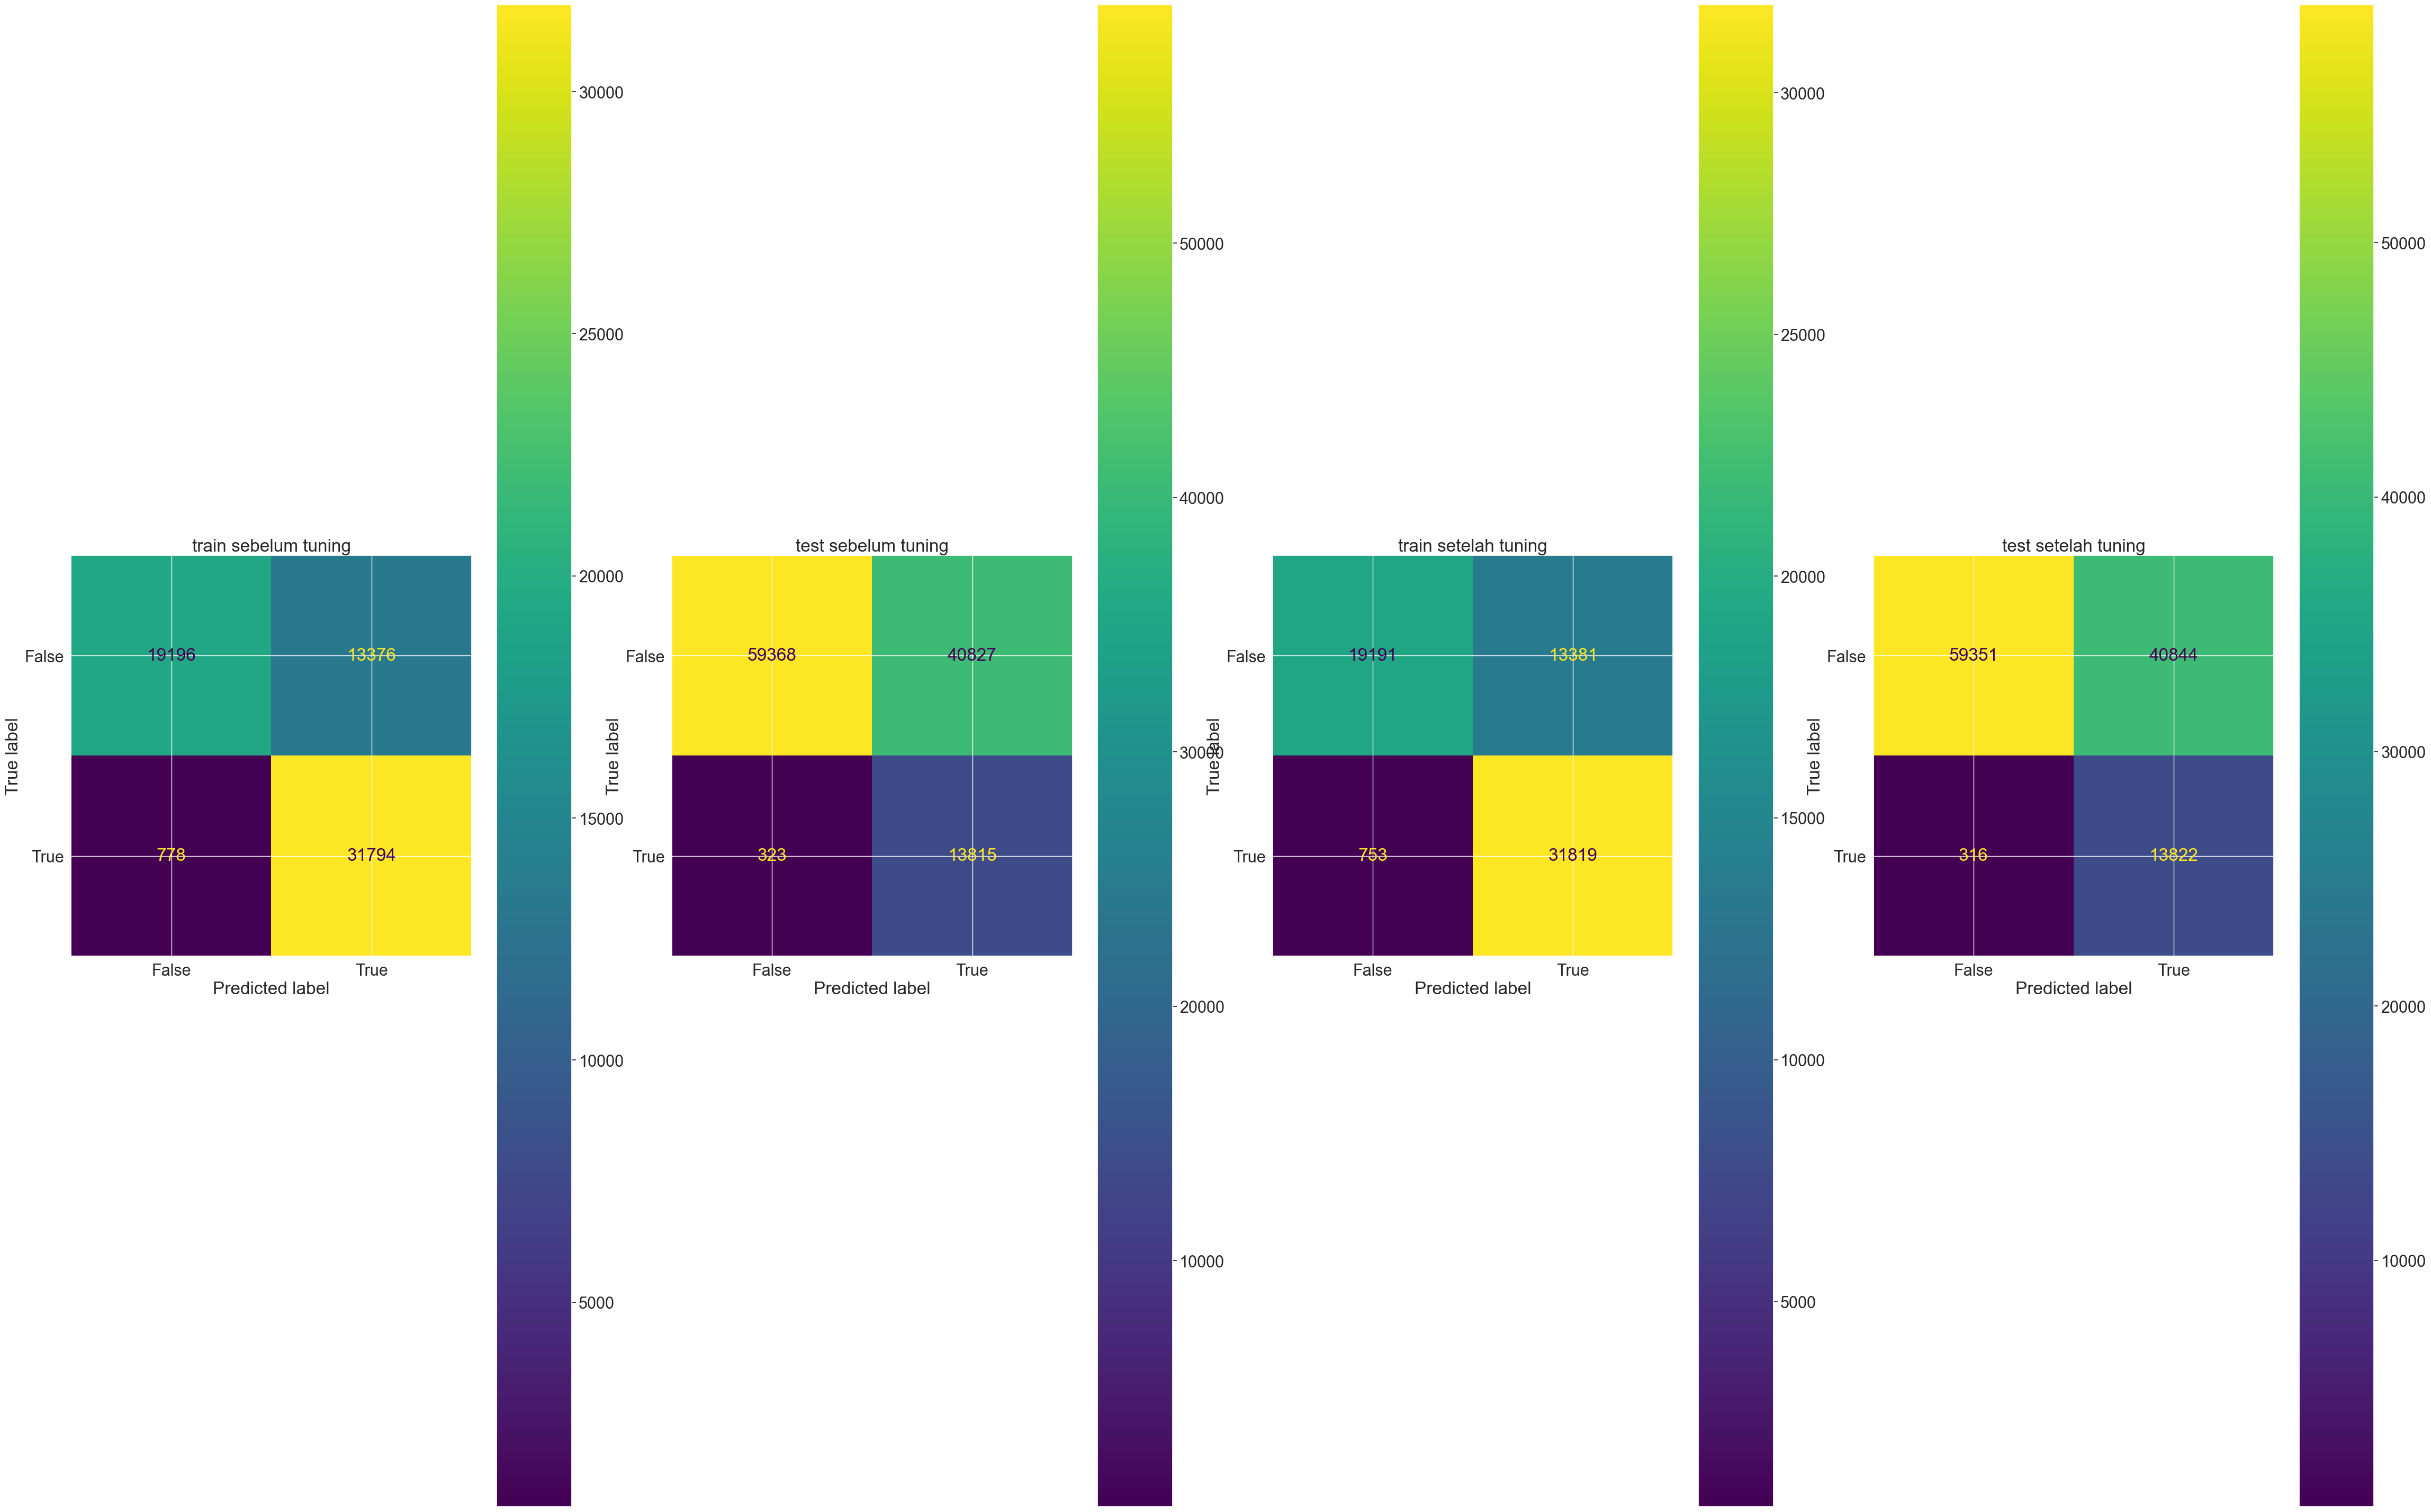

In [ ]:
plt.rcParams['figure.figsize'] = (50,50)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,4)
ax[0].set_title("train sebelum tuning")
ax[1].set_title("test sebelum tuning")
ax[2].set_title("train setelah tuning")
ax[3].set_title("test setelah tuning")

# fit data pada model yang belum di tuning
logreg = LogisticRegression(random_state= 42)
logreg.fit(X_train, y_train)
y_pred_train_logreg = logreg.predict(X_train)
y_pred_test_logreg = logreg.predict(X_test)

# fit data pada model setelah melakukan tuning
logreg_rs = LogisticRegression(random_state= 42, penalty = 'l2', fit_intercept = False, C = 0.25)
logreg_rs.fit(X_train, y_train)
y_pred_train_logreg_rs = logreg_rs.predict(X_train)
y_pred_test_logreg_rs = logreg_rs.predict(X_test)

print("Score train sebelum tuning logreg")
print(metrics.classification_report(y_train,y_pred_train_logreg))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_logreg),
display_labels = [False, True]).plot(ax=ax[0])

print("Score test sebelum melakukan tuning logreg")
print(metrics.classification_report(y_test,y_pred_test_logreg))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_logreg),
display_labels = [False, True]).plot(ax=ax[1])

print("Score train setelah tuning logreg")
print(metrics.classification_report(y_train,y_pred_train_logreg_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_logreg_rs),
display_labels = [False, True]).plot(ax=ax[2])

print("Score test setelah melakukan tuning logreg")
print(metrics.classification_report(y_test,y_pred_test_logreg_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_logreg_rs),
display_labels = [False, True]).plot(ax=ax[3])

- Setelah melakukan tuning kita berhasil menaikan recall score dari 97% meskipun tidak terlalu signifikan menggunakan randomized search karena pada saat menggunakan metode tersebut memiliki compute time yang relatif cepat
-  Setelah melakukan tuning kita berhasil mengurangi false negative yang lumayan, sehingga hal ini bisa membuat model untuk memprediksi customer yang memang benar - benar tidak berminat untuk membeli asuransi lebih akurat dan dapat mencegah cost loss perusahaan.
- Dan setelah tuning pada data test memiliki kenaikan true postive yang bisa menjadi peningkatan conversion rate sesuai dengan tujuan bisnis

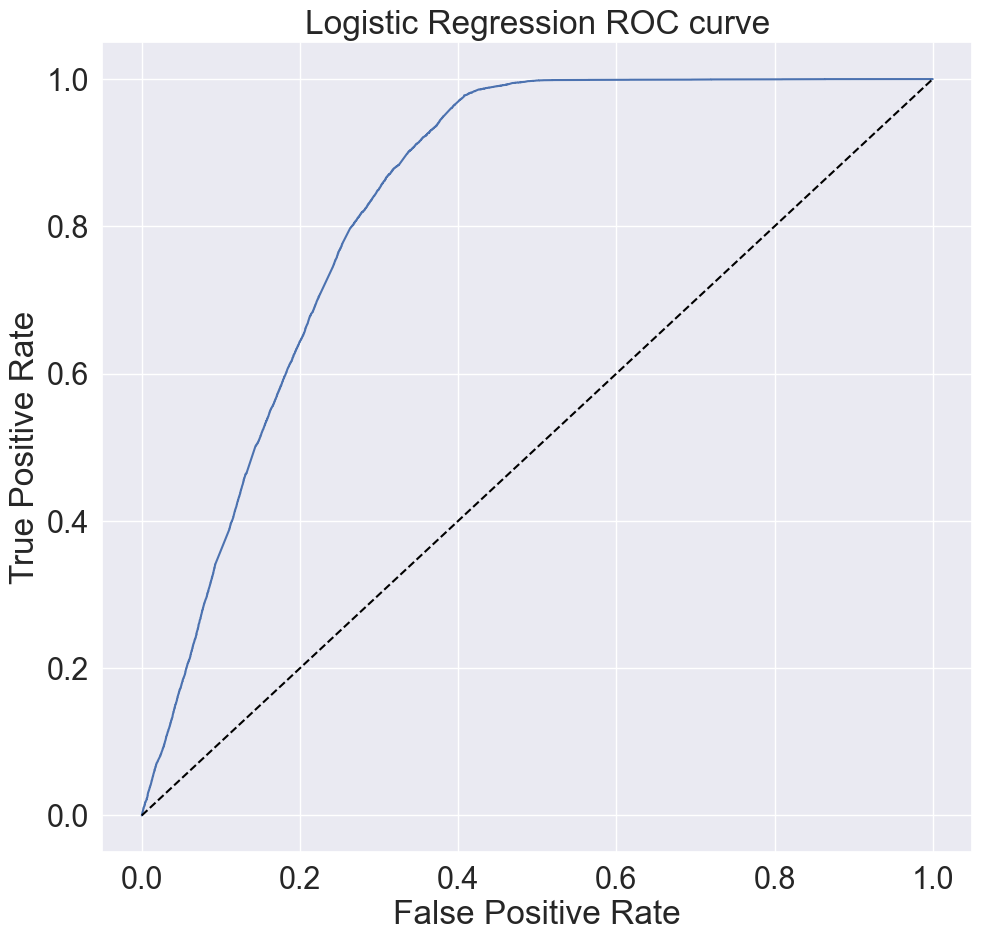

In [ ]:
# melihat kurva ROC
logreg_rs_1 = LogisticRegression(random_state= 42, penalty = 'l2', fit_intercept = False, C = 0.25)
logreg_rs_1.fit(X_train, y_train)
y_pred_test_logreg_rs_1 = logreg_rs_1.predict(X_test)
y_pred_proba_1 = logreg_rs_1.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_1)
plt.figure(figsize=(10,10))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## Hyperparameters tuning GNB

In [ ]:
bayes = GaussianNB()

param_bayes = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
Model_grid_bayes = RandomizedSearchCV(bayes, param_distributions=param_bayes, verbose=1, cv=10, n_jobs=-1,scoring='recall')
Model_grid_bayes.fit(X_train, y_train)

print(Model_grid_bayes.best_params_)
print(Model_grid_bayes.score(X_train, y_train), Model_grid_bayes.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'var_smoothing': 0.533669923120631}
0.9769126857423553 0.9769127570159603


GNB Model - Train Score sebelum Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32572
           1       0.70      0.98      0.82     32572

    accuracy                           0.78     65144
   macro avg       0.83      0.78      0.77     65144
weighted avg       0.83      0.78      0.77     65144

GNB Model - Test Score sebelum Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100195
           1       0.25      0.98      0.40     14138

    accuracy                           0.64    114333
   macro avg       0.62      0.79      0.57    114333
weighted avg       0.90      0.64      0.70    114333

GNB Model - Train Score setelah Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32572
           1       0.70      0.98      0.82     32572

    accuracy         

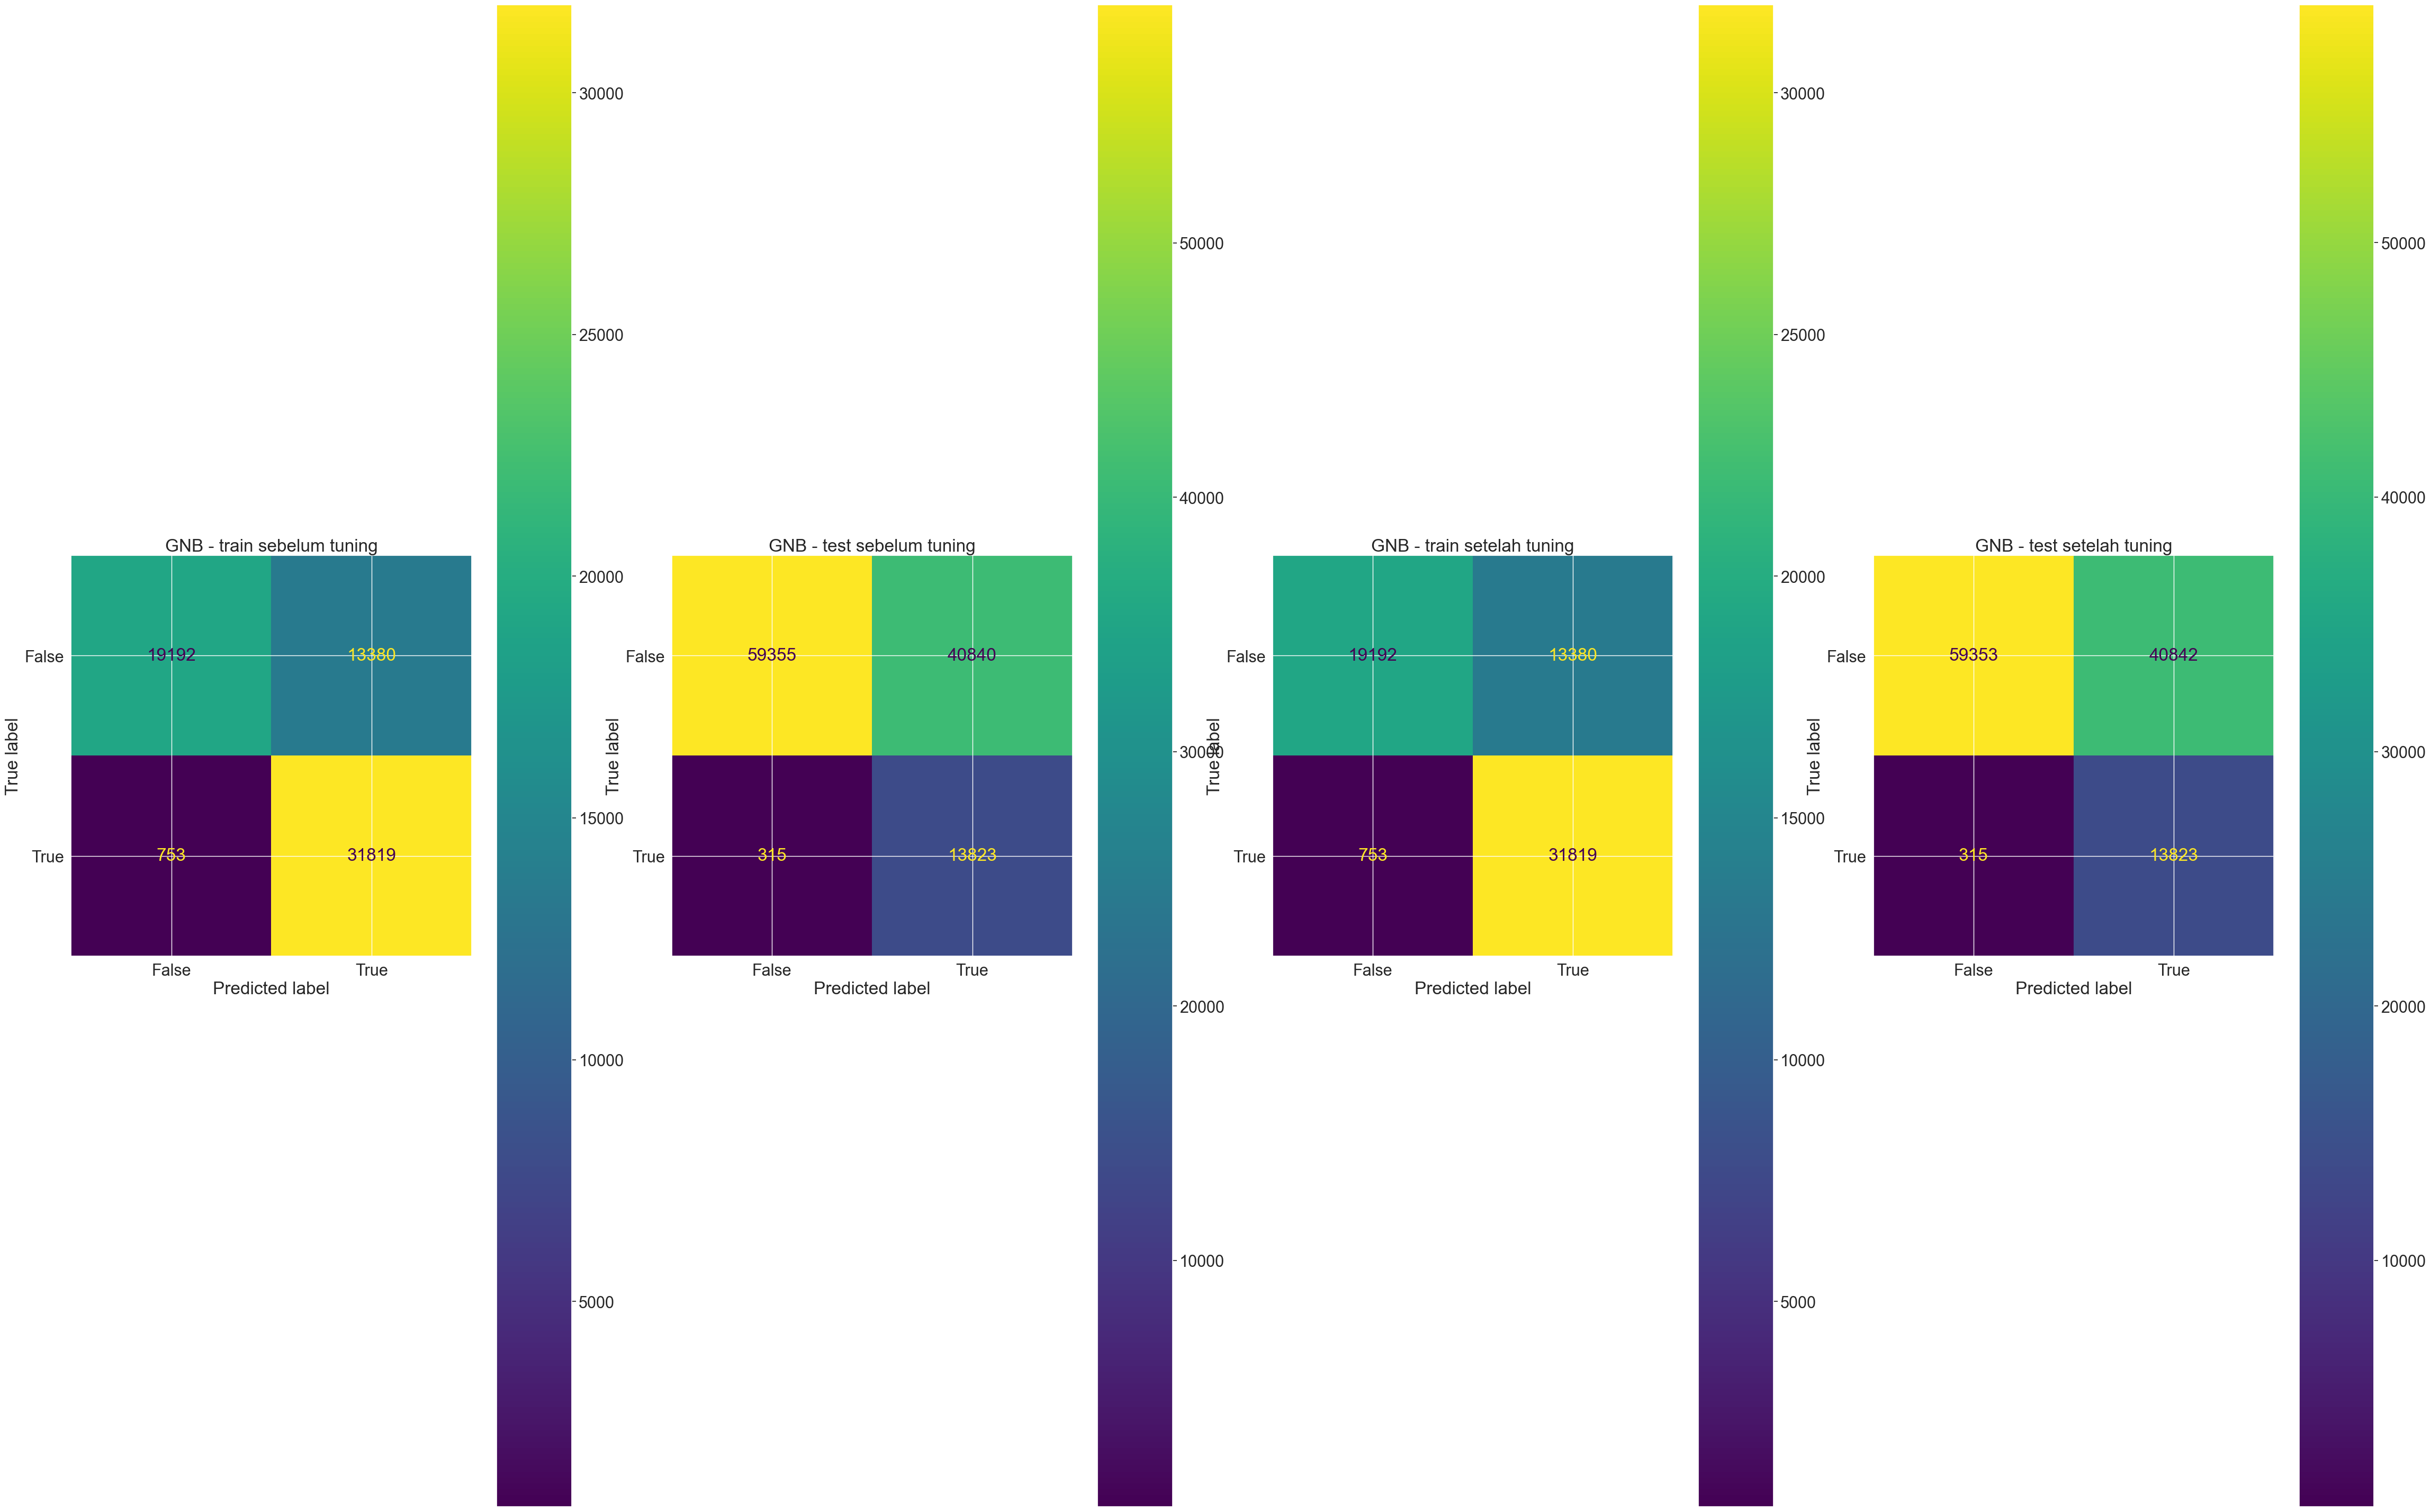

In [ ]:
# menunjukan confusion matrix untuk tuning GNB
plt.rcParams['figure.figsize'] = (50,50)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,4)
ax[0].set_title("GNB - train sebelum tuning")
ax[1].set_title("GNB - test sebelum tuning")
ax[2].set_title("GNB - train setelah tuning")
ax[3].set_title("GNB - test setelah tuning")

bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred_train_bayes = bayes.predict(X_train)
y_pred_test_bayes = bayes.predict(X_test)

bayes_rs = GaussianNB(var_smoothing= 0.0533669923120631)
bayes_rs.fit(X_train, y_train)
y_pred_train_nb_rs = bayes_rs.predict(X_train)
y_pred_test_nb_rs = bayes_rs.predict(X_test)


print("GNB Model - Train Score sebelum Hyperparameter Tuning")
print(metrics.classification_report(y_train,y_pred_train_bayes))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_bayes),
display_labels = [False, True]).plot(ax=ax[0])

print("GNB Model - Test Score sebelum Hyperparameter Tuning")
print(metrics.classification_report(y_test,y_pred_test_bayes))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_bayes),
display_labels = [False, True]).plot(ax=ax[1])

print("GNB Model - Train Score setelah Hyperparameter Tuning")
print(metrics.classification_report(y_train,y_pred_train_nb_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_nb_rs),
display_labels = [False, True]).plot(ax=ax[2])

print("GNB Model - Test Score setelah Hyperparameter Tuning")
print(metrics.classification_report(y_test,y_pred_test_nb_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_nb_rs),
display_labels = [False, True]).plot(ax=ax[3])

Dari hasil hyper parameter diatas sepertinya naive bayes sudah berada di batas max dan sudah tidak memiliki kenaikan yang signifikan pada saat dilakukan hyperparameter tuning maka dari itu bisa disimpulkan bahwa logistic regresion adalah best model untuk dataset ini

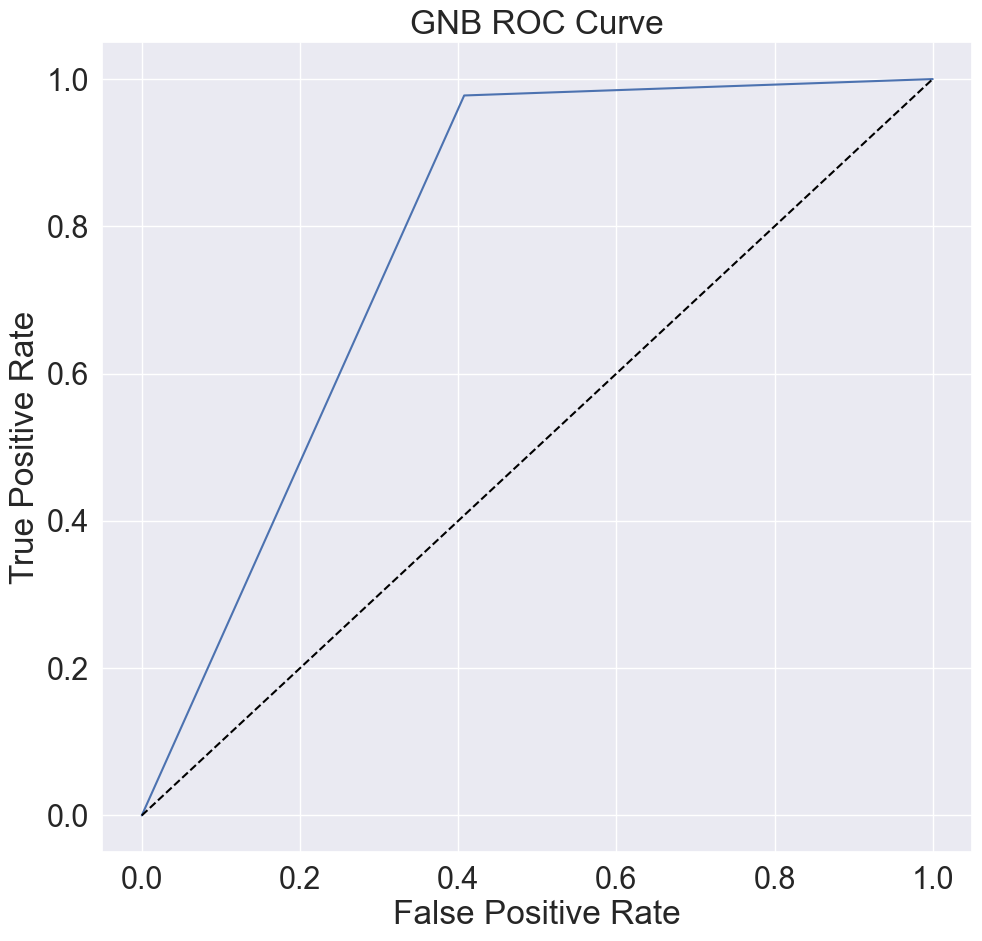

In [ ]:
# ROC curve naive bayes
bayes_rs1 = GaussianNB(var_smoothing= 0.0533669923120631)
bayes_rs1.fit(X_train, y_train)
y_pred_test_nb_rs1 = bayes_rs1.predict(X_test)
y_pred_test_nb_rs1_proba = bayes_rs1.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_test_nb_rs1_proba)
plt.figure(figsize=(10,10))
plt.title('GNB ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# 2. Feature importance

Previously_Insured   -0.938173
Age_Group            -0.297363
Gender               -0.053131
Annual_Premium        0.058030
Vehicle_Age           0.457928
Vehicle_Damage        0.778335
dtype: float64




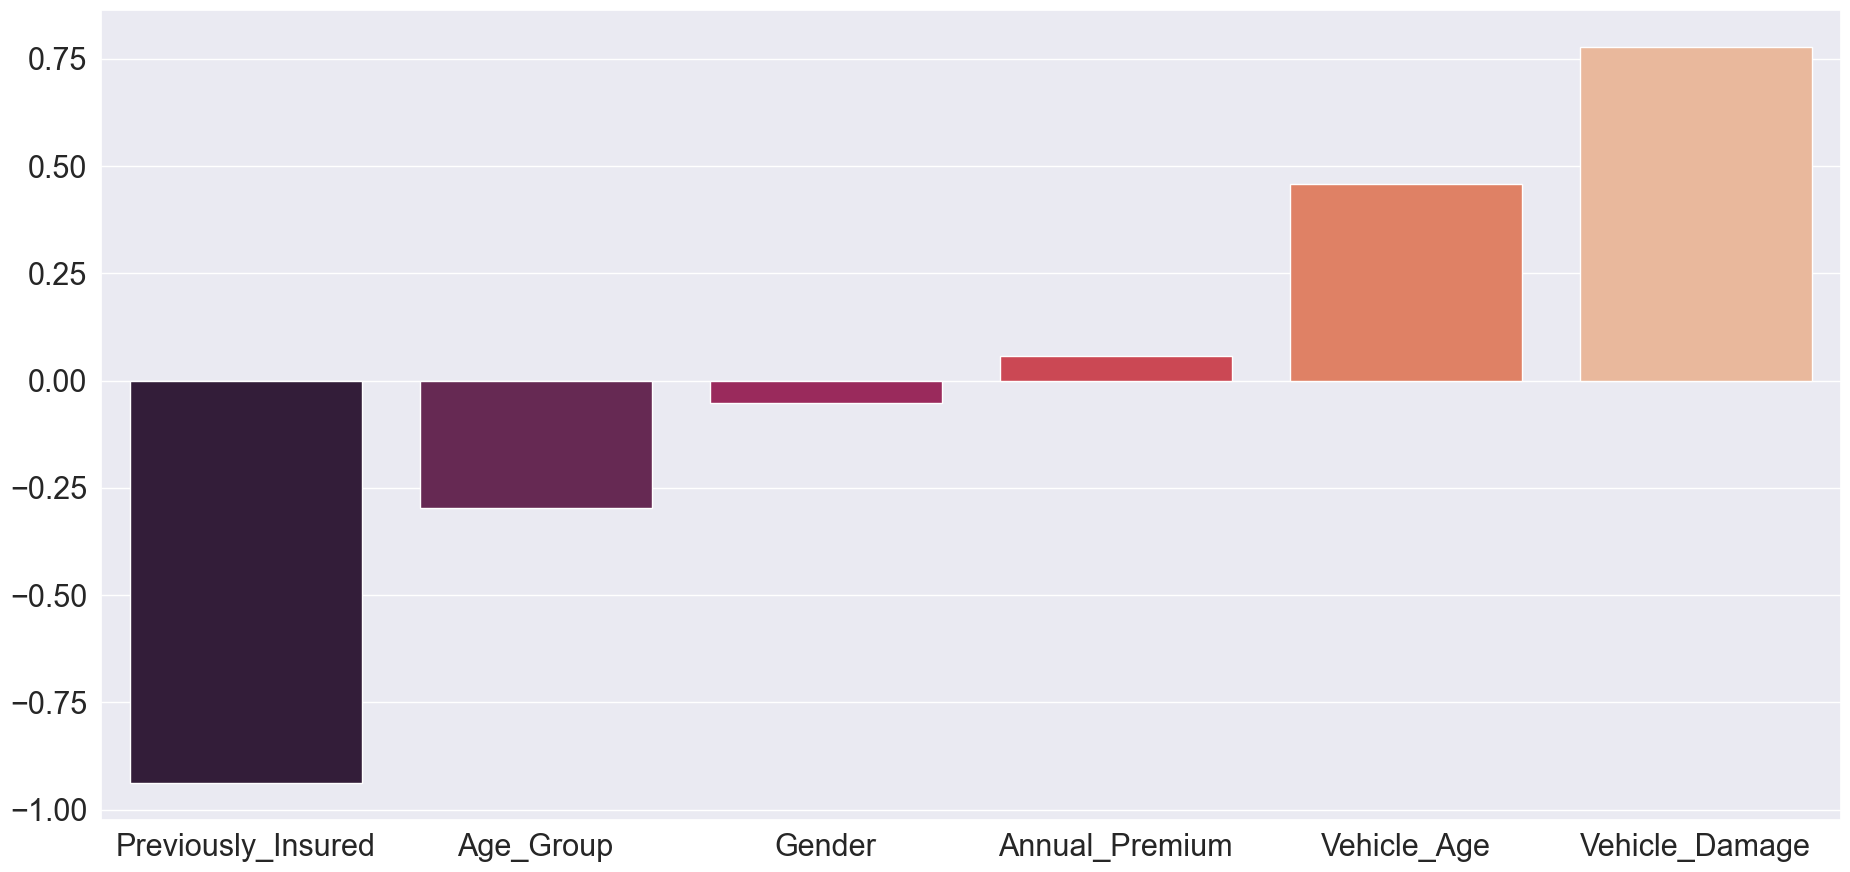

In [ ]:
# melakukan inisiasi pada best model
coef = pd.Series(data=logreg_rs.coef_[0], index=X.columns)
coef = coef.sort_values()
print(coef)
print('\n')
plt.figure(figsize=(20,10))
sns.barplot(x=coef.index, y=coef.values, palette="rocket")
plt.show()

- Pada dataset ini memiliki beberapa fitur yang penting, sesuai dari grafik diatas ada 2 fitur yang dominan yaitu vehicle damage dan vehicle age.Fitur vehicle damage memiliki importance score yang tinggi, maka fitur tersebut memiliki hubungan yang kuat pada conversion rate hal ini didukung dengan artikel dari analyticsvidhya.com dalam artikelnya yang berjudul  “Cross-Sell Prediction Using Machine Learning in Python” yang menyatakan bahwa:

    * Customer yang kendaraan nya pernah rusak cenderung lebih memiliki pengalaman dan pengetahuan dari segi cost yang harus dikeluarkan untuk memperbaiki kendaraan nya. Dari segi pengalaman customer, apabila menggunakan asuransi, cost yang dikeluarkan jauh lebih murah daripada saat tidak menggunakan asuransi, karena saat menggunakan asuransi kendaraan, customer dapat mendapatkan klaim dari asuransi disaat kendaraan mereka rusak, sedangkan apabila tidak menggunakan asuransi, customer akan menanggung biaya perbaikan nya sendiri (yang jauh lebih mahal).<br>

- Untuk vehicle age juga memiliki score tertinggi kedua yang bearti usia kendaraan juga memiliki kemungkinan tinggi untuk customer membeli asuransi kendaraan.Dari EDA yang sudah ditampilkan usia kendaraan kurang dari 2 tahun akan membeli asuransi kendaraan, karena untuk beberapa customer dengan memiliki mobil baru mereka akan merawat kendaraan yang baru dimiliki. Hal ini juga didukung oleh forbes.com dalam artikelnya yang berjudul “advisor/car-insurance/new-car-replacement” yang menyatakan bahwa kendaraan baru lebih banyak memiliki asuransi, karena hal sebagai berikut:

    * Penurunan nilai/Depresiasi nilai kendaraan dapat merugikan customer disaat customer mengalami kecelakaan tak lama setelah customer membeli mobil baru. Perusahaan asuransi kemungkinan besar akan mengganti nilai kendaraan dibawah harga beli karena karena depresiasi dan kecelakaan tersebut, sehingga klaim yang dibayarkan tidak cukup untuk mengcover nilai kendaraan customer, sehingga disarankan untuk mempunyai asuransi kendaraan, seperti contoh nya adalah “asuransi penggantian mobil baru”.

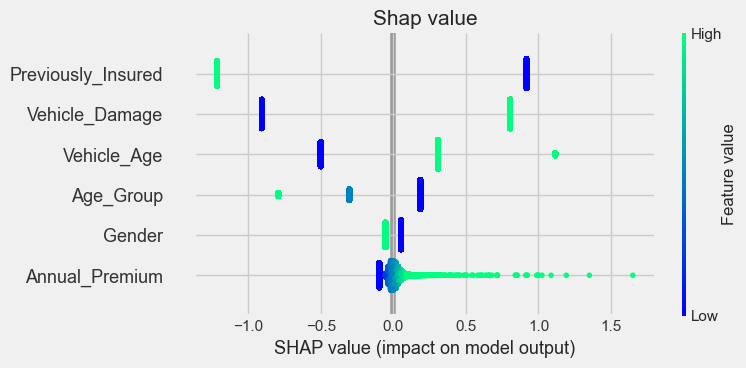

In [ ]:

explainer = shap.Explainer(logreg_rs, X_test, feature_names=X_test.columns)
shap_values = explainer(X_test)

plt.title("Shap value", fontsize= 15)
shap.summary_plot(shap_values, X_test, cmap= 'winter')


## Business insight
- Bisa dilihat pada fitur previously insured sangat tidak membantu dalam pemodelan, karena sudah pasti jika customer sudah memiliki asuransi maka tidak akan berlanggan asuransi lagi kecuali perusahaan bisa mengadakan event,promo menarik yang bisa menggaet customer yang sudah memiliki asuransi pada perusahaan lain .
- Pada fitur vehicle damage, jika customer pernah mengalami kerusakan pada kendaraan maka customer memiliki kemungkinan yang tinggi untuk melakukan pembelian asuransi, dikarenan biaya yang mahal pada saat melakukan perbaikan apabila tidak dicover oleh asuransi.
- Fitur vehicle age juga memiliki kontribusi untuk customer membeli asuransi, karena ketika kendaaran baru customer cenderung melakukan perawatan maksimal dengan salah satu cara yaitu membeli asuransi agar lebih aman.

## Business recomendation
- Jika ingin menarik customer yang sudah memiliki asuransi maka sangat disarankan untuk melakukan pendekatan customer secara detail, dengan cara melakukan penyebaran kuisioner atau mengadakan event yang menarik supaya customer bisa beralih yang sebelumnya dari perusahaan competitor menjadi memiliki minat untuk membeli asuransi di perusahaan. Selain itu perusahaan juga dapat memberikan diskon untuk calon customer yang sudah memiliki asuransi sebelumnya dengan skema sebagai berikut:
  - Safety Driver Discount - Memberikan diskon 25% untuk customer yang tidak memiliki catatan kecelakaan kendaraan sebelumnya.
  - Young Driver Discount - Memberikan diskon 20% untuk customer yang berusia dibawah 25 tahun
  - Mature Driver Discount - Memberikan diskon 15% untuk customer yang berusia diatas 50 tahun
- Melakukan campaign yang berfokus pada customer yang sudah pernah mengalami kerusakan pada kendaraan. Selain itu perusahaan juga dapat menawarkan layanan add-on gratis khusus kepada customer yang sudah pernah mengalami kerusakaan pada kendaraan dengan opsi layanan sebagai berikut:
  - Zero-Depreciation - Biasanya dalam kasus klaim asuransi kendaraan, perusahaan asuransi membayar penggantian suku cadang setelah dikurangi penyusutan, namun dalam hal ini untuk menarik customer, perusahaan dapat menawarkan pembayaran full untuk suku cadang nya dengan tidak dikurangi biaya penyusutan.
  - Engine Protection - Layanan Add-on ini akan mengcover biaya penggantian khusus apabila terjadi kerusakan pada mesin kendaraan. Perusahaan akan menanggung biaya perbaikan mesin seperti jika ada kerusakan mesin akibat cuaca buruk, seperti banjir yang mengakibatkan masuknya air pada mesin kendaraan yang menyebabkan kendaraan rusak.
  - 24x7 Roadside Assistance - Kerusakan kendaraan paling sering terjadi saat di jalanan. Customer mungkin terjebak saat hujan terus-menerus karena kendaraan tidak dapat dihidupkan atau ketika ban customer pecah saat sedang berkendara di jalan. Untuk mendapatkanmenarik customer dan membantu customer mendapatkan bantuan dalam keadaan seperti ini, perusahaan dapat memberikan layanan Add-on bantuan pinggir jalan (Roadside Assistance) kapan pun dan dimanapun (24x7). Dengan layanan ini customer bisa mendapatkan bantuan antara lain memperbaiki roda atau derek mobil. Dengan layanan ini perusahaan akan mencegah customer terdampar tanpa bantuan apa pun selama beberapa jam. Paket-paket yang dapat ditawarkan oleh perusahaan lewat Add-on ini seperti Derek Mobil, Menyalakan Baterai, Perbaikan Ban Kempes. Layanan ini akan sangat berguna bagi individu/calon customer yang sering melakukan perjalanan jarak jauh melalui jalan darat, karena dapat membantu jika terjadi kerusakan mekanis, ban bocor, atau keadaan darurat lainnya.
- Mengadakan campaign pada saat customer membeli kendaraan baru, karena pada saat customer membeli kendaraan baru, pasti akan sangat memperhatikan kendaraanya. maka dari itu perusahaan harus menyusun strategi campaign yang tepat. Selain itu perusahaan juga disarankan untuk bekerja sama dengan dealer/showroom kendaraan seperti berikut:
  - Melakukan bundling asuransi kendaraan dengan customer yang membeli kendaraan, terutama pada usia kendaraan yang baru atau berusia 1-2 tahun untuk memaksimalkan konversi asuransi dari penjualan kendaraan yang berasal dari dealer/showroom.


## Best model

In [ ]:
best_models = [
    ['Logistic Regression', LogisticRegression(random_state= 42, penalty = 'l2', fit_intercept = False, C = 0.25)],
    ['GNB', GaussianNB(var_smoothing= 0.0533669923120631)],
]

In [ ]:
def eval_classification(best_models):
    model_name = []
    # recall
    cv_recall_test = []
    training_recall = []
    # precision
    cv_precision_test = []
    training_precision = []
    # F1
    cv_f1_test = []
    training_f1 = []
    # ROC AUC
    cv_roc_auc_test = []
    training_roc_auc = []

    for name, model in best_models:
        model.fit(X_train, y_train)
        model_name.append(name)

        #score
        scoring= ['recall', 'precision', 'f1', 'roc_auc']

        #CV
        cv_score = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, n_jobs = -1)

        # train
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]

        training_recall.append(recall_score(y_train,y_pred_train))
        training_precision.append(precision_score(y_train, y_pred_train))
        training_f1.append(f1_score(y_train, y_pred_train))
        training_roc_auc.append(roc_auc_score(y_train, y_pred_proba_train))

        #test
        cv_recall_test.append(abs(cv_score['test_recall']).mean())
        cv_precision_test.append(abs(cv_score['test_precision']).mean())
        cv_f1_test.append(abs(cv_score['test_f1']).mean())
        cv_roc_auc_test.append(abs(cv_score['test_roc_auc']).mean())

    return pd.DataFrame({
        'Model': model_name,
        'Training Recall' : training_recall,
        'CV Recall test': cv_recall_test,
        'Training Precision' : training_precision,
        'CV Precision test' : cv_precision_test,
        'Training F1' : training_f1,
        'CV F1 test' : cv_f1_test,
        'Training AUC_ROC' : training_roc_auc,
        'CV AUC_ROC test' : cv_roc_auc_test,
    })

In [ ]:
eval_classification(best_models)

Model  Training Recall  CV Recall test  Training Precision  \
0  Logistic Regression         0.976882        0.976851            0.703960   
1                  GNB         0.976882        0.976882            0.703976   

   CV Precision test  Training F1  CV F1 test  Training AUC_ROC  \
0           0.703982     0.818264    0.818264          0.833569   
1           0.703989     0.818274    0.818279          0.811044   

   CV AUC_ROC test  
0         0.833491  
1         0.811114

# Conclusion

- Mulai dari dataset ,awalnya kami memeriksa nilai null dan duplikat. Tidak ada nilai nol dan duplikat sehingga tidak perlu handle missing value/duplicate terhadap hal tersebut tidak diperlukan.pada saat data preprocessing , kami menerapkan teknik standarize fitur untuk menormalkan data agar mempermudah pemrosesan dengan algoritma ML. pada dataset ini karena ingin meningkatkan conversion rate maka kita memfokuskan recall score yang berfokus pada true positive sebanyak - banyaknya.

- Melalui EDA, kami mengkategorikan Usia, kami mengamati bahwa pelanggan yang termasuk dalam kelompok youngAge lebih tertarik pada respons kendaraan. Kami mengamati bahwa pelanggan yang memiliki kendaraan berusia kurang dari 2 tahun cenderung lebih tertarik pada asuransi kendaraan. Demikian pula, pelanggan yang memiliki kendaraan rusak cenderung lebih tertarik pada asuransi kendaraan.

- Untuk Seleksi Fitur, kami menggunakan heatmap dan uji multikolonieritas untuk fitur numerik dan untuk fitur kategorikal, kami menerapkan encoding. Di sini kami mengamati berdasarkan dua hal tersebut lalu mengambil fitur yang memiliki korelasi dan lolos uji VIF

- Selanjutnya, kami menerapkan Algoritma machine learning untuk menentukan apakah pelanggan tertarik dengan Asuransi Kendaraan. Untuk algoritma kita memakai :
    *   Logistic Regression
    *   XGBoost
    *   Decision Tree
    *   Random Forest
    *   Naive Bayes
    *   KNN<br>

- Setelah mengetahui hasil dari beberapa logaritma ML kita melihat bahwa pada score **logistic regression** mendapatkan skor recall sebesar **97%** setelah melakukan hyperparameter, mengalami peningkatan  meskipun tidak terlalu signifikan. Begitu pula untuk **Naive bayes Classifier** yang memiliki recall score **97%**. maka kita dapat mengambil kesimpulan bahwa dua model tersebut merupakan best fit untuk pemodelan kali ini.

- Untuk Business Recommendation kami memfokuskan pada 3 feature yaitu Previously_Insured, Previously_Damaged dan Vehicle_Age sebagai berikut
    *   Previously_Insured - Perusahaan disarankan untuk melakukan pendekatan customer secara detail, dengan cara melakukan penyebaran kuisioner atau mengadakan event yang menarik untuk customer dan perusahaan juga disarankan untuk memberikan diskon untuk customer seperti diskon untuk "Safety Driver", "Young Driver" dan "Mature Driver".
    *   Previously_Damaged - Perusahaan disarankan melakukan campaign yang berfokus pada customer yang sudah pernah mengalami kerusakan pada kendaraan dan perusahaan juga disarankan untuk dapat menawarkan layanan add-on gratis khusus kepada customer yang sudah pernah mengalami kerusakaan pada kendaraan dengan opsi layanan add on seperti "Zero-Depreciation", "Engine Protection", dan "24x7 Roadside Assistance".
    *   Vehicle_Age - Perusahaan disarankan untuk mengadakan campaign pada saat customer membeli kendaraan baru, dan bekerja sama dengan dealer/showroom kendaraan dengan cara melakukan bundling asuransi kendaraan dengan customer yang membeli kendaraan, terutama pada usia kendaraan yang baru atau berusia 1-2 tahun untuk memaksimalkan konversi asuransi dari penjualan kendaraan yang berasal dari dealer/showroom.

##3. Git##

Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada perubahan version dari waktu ke waktu.

* A. Buat Repository Git

* B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut

Untuk file README, dapat merupakan summary dari proses modelling dan feature importance yang telah dilakukan. Boleh menggunakan repositori yang sama atau membuat baru.

**3A. Buat Repository Git**


*Repository Git sudah dibuat di link sebagai berikut: https://github.com/fauzanheryka/Data_Connector*

**3B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut**

*File notebook dan README telah diupload di repository git:
https://github.com/fauzanheryka/Data_Connector.*